In [9]:
from sqlalchemy import create_engine, text
import pandas as pd
import numpy as np

db_conn = {
     "user": "root",
     "password": "Dhyoon96!",
     "host": "127.0.0.1",
     "database": "side_proj_FCO"
 }

db_engine = "mysql+pymysql://%s:%s@%s/%s" % (
    db_conn["user"],
    db_conn["password"],
    db_conn["host"],
    db_conn["database"]
)

engine = create_engine(db_engine, echo=True)

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rc('font', family = 'Malgun Gothic') # 한글 설정 (맑은 고딕)
mpl.rc('axes', unicode_minus = False) # 음수 부호 깨지는거 설정

import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [11]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [12]:
df_query = 'SELECT * FROM match_user'
df1 = pd.read_sql(df_query, con = engine);

2024-12-22 17:25:12,780 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-12-22 17:25:12,781 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-22 17:25:12,782 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-12-22 17:25:12,783 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-22 17:25:12,785 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-12-22 17:25:12,786 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-22 17:25:12,789 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-22 17:25:12,790 INFO sqlalchemy.engine.Engine [generated in 0.00078s] {'table_schema': 'side_proj_fco', 'table_name': 'SELECT * FROM match_user'}
2024-12-22 17:25:12,791 INFO sqlalchemy.engine.Engine SELECT * FROM match_user
2024-12-22 17:25:12,791 INFO sqlalchemy.engine.Engine [raw sql] {}


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   match_id                          617 non-null    object 
 1   user_ouid                         617 non-null    object 
 2   user_nickname                     617 non-null    object 
 3   match_result                      617 non-null    object 
 4   match_endtype                     617 non-null    int64  
 5   match_possession                  617 non-null    int64  
 6   match_avg_rating                  617 non-null    float64
 7   match_total_dribble               617 non-null    int64  
 8   match_total_pass_try              617 non-null    int64  
 9   match_total_pass_suc              617 non-null    int64  
 10  match_total_shoot                 617 non-null    int64  
 11  match_total_shoot_eff             617 non-null    int64  
 12  match_to

In [14]:
df1.describe()

match_endtype  match_possession  match_avg_rating  match_total_dribble  \
count     617.000000        617.000000        617.000000           617.000000   
mean        1.452188         51.491086          3.840159            12.202593   
std         0.498113         20.821918          0.440101             9.995752   
min         1.000000          0.000000          2.688890             0.000000   
25%         1.000000         41.000000          3.500000             4.000000   
50%         1.000000         52.000000          3.788890            10.000000   
75%         2.000000         62.000000          4.172220            19.000000   
max         2.000000        100.000000          6.111110            46.000000   

       match_total_pass_try  match_total_pass_suc  match_total_shoot  \
count            617.000000            617.000000         617.000000   
mean              17.019449             15.079417           1.602917   
std               13.960041             12.708336           1.770847   
min                0.000000              0.000000           0.000000   
25%                5.000000              5.000000           0.000000   
50%               13.000000             12.000000           1.000000   
75%               27.000000             23.000000           3.000000   
max               68.000000             64.000000          10.000000   

       match_total_shoot_eff  match_total_goal  attack_position_ratings  ...  \
count              617.00000        617.000000               617.000000  ...   
mean                 1.23987          0.787682                 6.388185  ...   
std                  1.44740          1.053123                 0.912283  ...   
min                  0.00000          0.000000                 4.180000  ...   
25%                  0.00000          0.000000                 5.820000  ...   
50%                  1.00000          0.000000                 6.100000  ...   
75%                  2.00000          2.000000                 6.950000  ...   
max                  8.00000          4.000000                10.000000  ...   

       match_total_pass_short_try  match_total_pass_short_suc  \
count                  617.000000                  617.000000   
mean                    11.734198                   11.034036   
std                     10.628497                   10.049899   
min                      0.000000                    0.000000   
25%                      3.000000                    3.000000   
50%                      9.000000                    9.000000   
75%                     19.000000                   17.000000   
max                     62.000000                   59.000000   

       match_total_pass_long_try  match_total_pass_long_suc  \
count                 617.000000                 617.000000   
mean                    0.768233                   0.376013   
std                     1.084017                   0.679912   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     1.000000                   1.000000   
max                     6.000000                   4.000000   

       match_total_pass_through_try  match_total_pass_through_suc  \
count                    617.000000                    617.000000   
mean                       3.910859                      3.290113   
std                        4.298916                      3.709209   
min                        0.000000                      0.000000   
25%                        1.000000                      0.000000   
50%                        3.000000                      2.000000   
75%                        6.000000                      5.000000   
max                       28.000000                     24.000000   

       match_total_shoot_outpenalty_try  match_total_shoot_outpenalty_suc  \
count                        617.000000               

In [15]:
df1['match_result'].value_counts()

match_result
승    338
패    279
Name: count, dtype: int64

In [17]:
df1['match_endtype'].value_counts() # 0 : 정상 종료, 1 : 몰수승, 2 : 몰수패

match_endtype
1    338
2    279
Name: count, dtype: int64

---

# 변수간 상관관계 및 VIF 확인

### 변수간 상관관계 분석 

In [18]:
df1_temp = df1.drop(columns = ['match_id', 'user_ouid', 'user_nickname', 'match_result'])

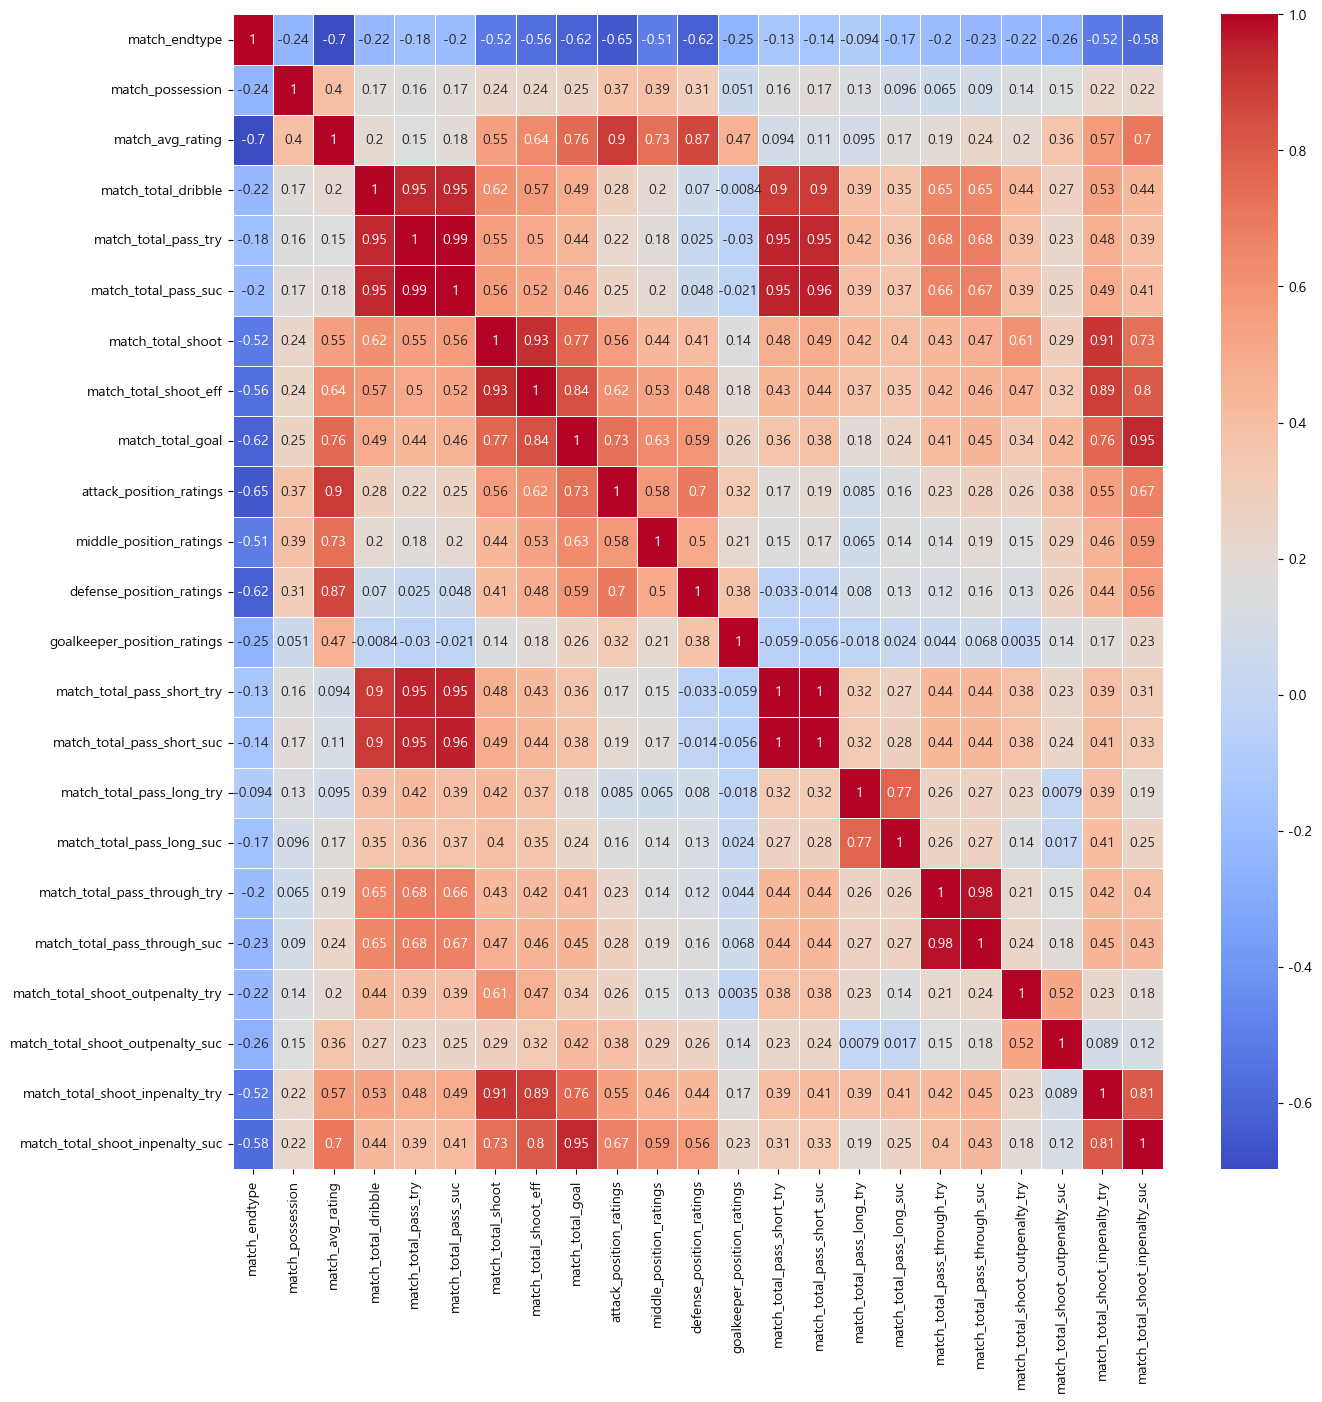

In [19]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df1_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [20]:
threshold = 0.9
corr_matrix = df1_temp.corr()

strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))    
    .stack()    
    .reset_index()  
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

print(strong_corr_pairs)

                       Variable 1                       Variable 2  \
49               match_avg_rating          attack_position_ratings   
63            match_total_dribble             match_total_pass_try   
64            match_total_dribble             match_total_pass_suc   
82           match_total_pass_try             match_total_pass_suc   
90           match_total_pass_try       match_total_pass_short_try   
91           match_total_pass_try       match_total_pass_short_suc   
107          match_total_pass_suc       match_total_pass_short_try   
108          match_total_pass_suc       match_total_pass_short_suc   
117             match_total_shoot            match_total_shoot_eff   
131             match_total_shoot  match_total_shoot_inpenalty_try   
161              match_total_goal  match_total_shoot_inpenalty_suc   
208    match_total_pass_short_try       match_total_pass_short_suc   
238  match_total_pass_through_try     match_total_pass_through_suc   

     Correlation  


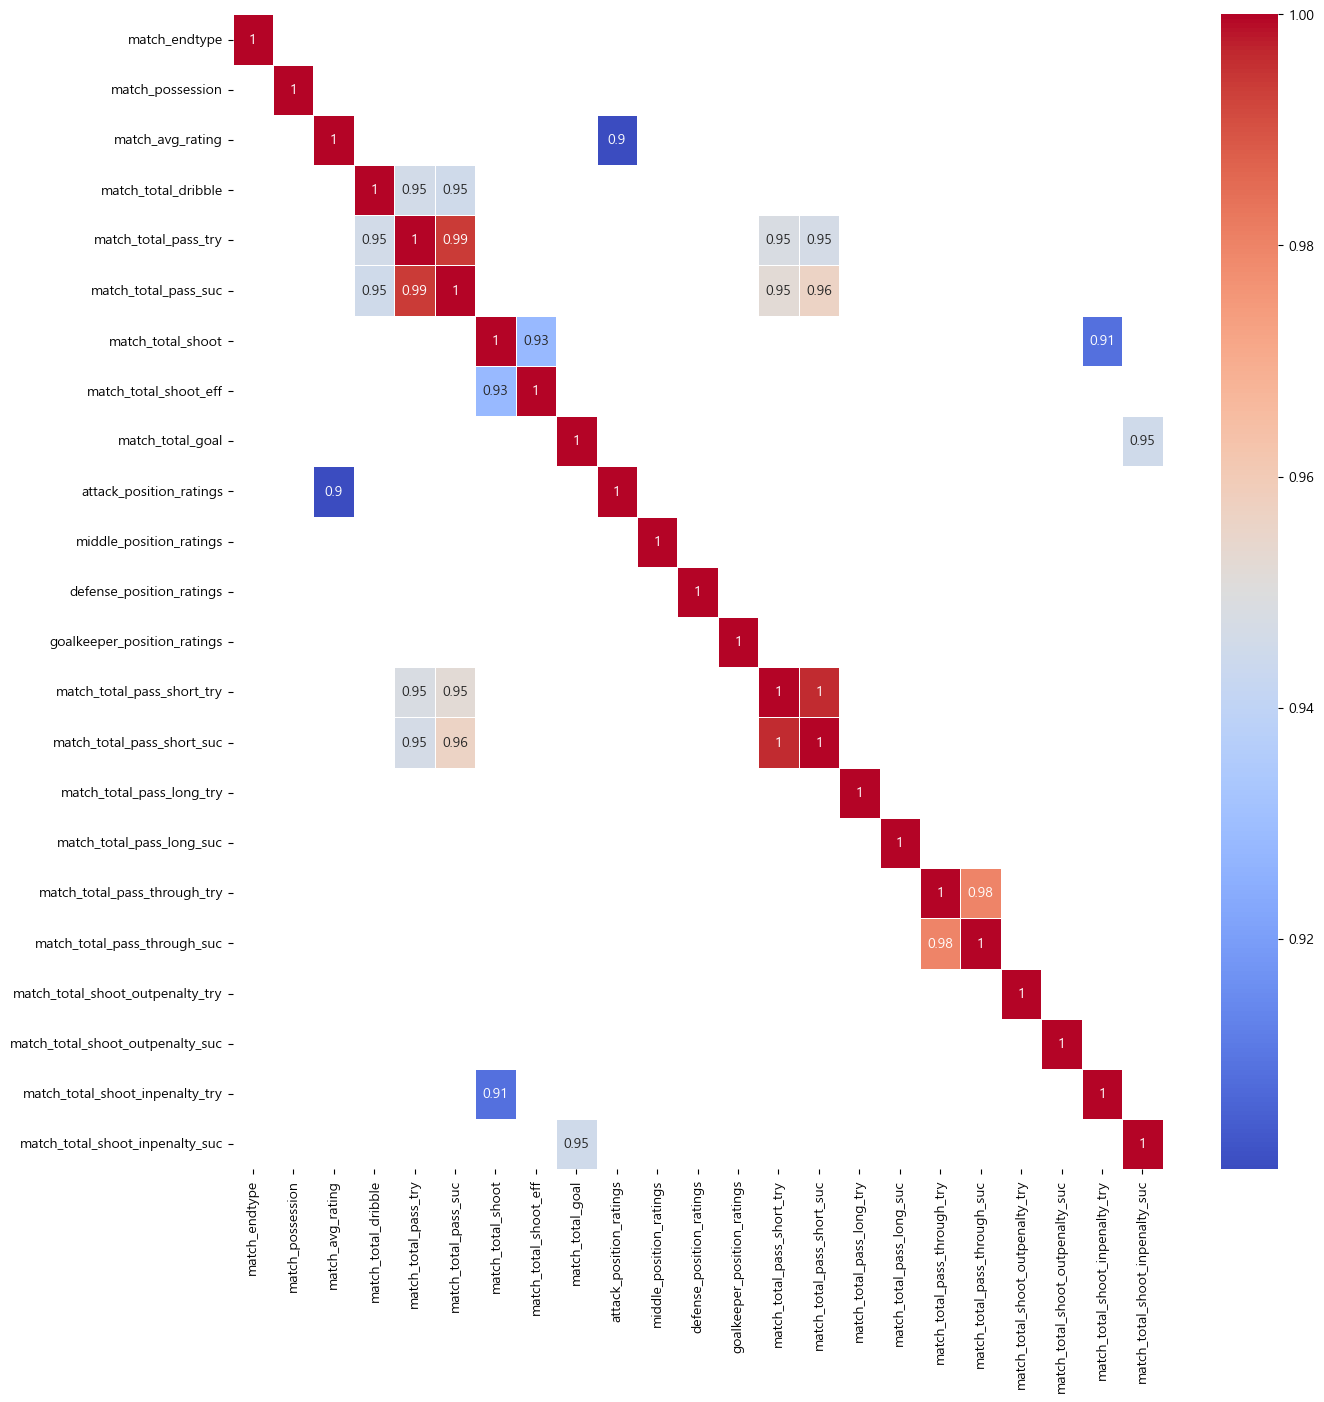

In [21]:
mask = np.abs(corr_matrix) <= threshold  

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, mask = mask, annot = True, linewidths = 0.5, cmap = 'coolwarm', ax = ax)
plt.show()

### 변수 제거 후 상관계수 및 VIF 확인

In [22]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Removal Based on VIF Threshold
def calculate_vif_(X, thresh = 10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped = True
    
    while dropped:
        dropped = False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(f"Dropping '{X[cols[variables]].columns[maxloc]}' at index {maxloc}")
            variables = np.delete(variables, maxloc)
            dropped = True

    if len(variables) == 0:
        print("All variables were removed. No remaining variables.")
        return pd.DataFrame() 

    print("Remaining variables:")
    print(X.columns[variables])
    return X[cols[variables]]

df2_temp = calculate_vif_(df1_temp)

# df2_temp = df1_temp.drop(columns = ['match_avg_rating', 
#                           'match_total_dribble', 'match_total_pass_try', 'match_total_pass_suc',
#                           'match_total_shoot', 'match_total_shoot_eff', 
#                           'match_total_pass_short_suc', 'match_total_pass_through_suc', 'match_total_pass_long_suc', 
#                           'match_total_shoot_outpenalty_suc', 'match_total_shoot_inpenalty_suc']
#                            + position_ratings_col)

Dropping 'match_avg_rating' at index 2
Dropping 'match_total_pass_suc' at index 4
Dropping 'match_total_shoot' at index 4
Dropping 'match_total_pass_short_try' at index 10
Dropping 'match_total_pass_try' at index 3
Dropping 'match_total_goal' at index 4
Dropping 'defense_position_ratings' at index 6
Dropping 'attack_position_ratings' at index 4
Dropping 'match_total_pass_through_try' at index 9
Dropping 'middle_position_ratings' at index 4
Dropping 'match_total_dribble' at index 2
Dropping 'match_total_shoot_eff' at index 2
Dropping 'goalkeeper_position_ratings' at index 2
Remaining variables:
Index(['match_endtype', 'match_possession', 'match_total_pass_short_suc',
       'match_total_pass_long_try', 'match_total_pass_long_suc',
       'match_total_pass_through_suc', 'match_total_shoot_outpenalty_try',
       'match_total_shoot_outpenalty_suc', 'match_total_shoot_inpenalty_try',
       'match_total_shoot_inpenalty_suc'],
      dtype='object')


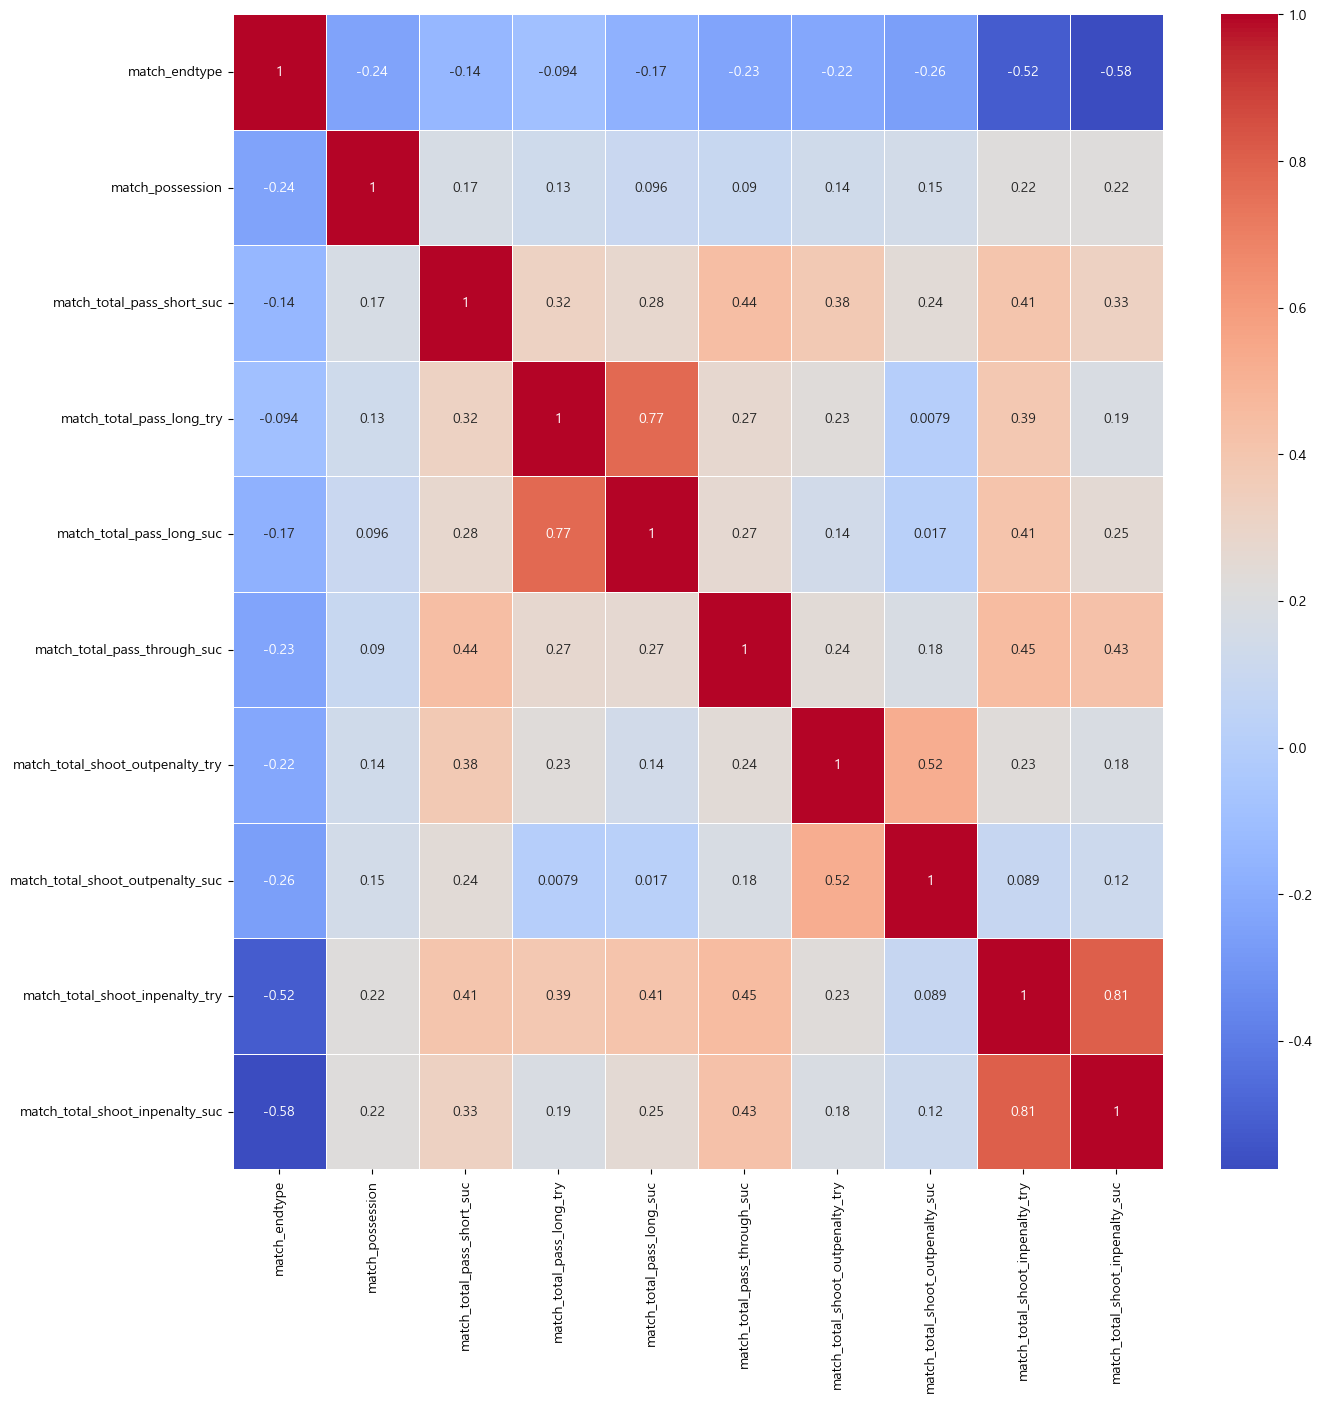

In [23]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df2_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [24]:
threshold = 0.7
corr_matrix = df2_temp.corr()
strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))  
    .stack()   
    .reset_index()    
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

print(strong_corr_pairs)

                         Variable 1                       Variable 2  \
24        match_total_pass_long_try        match_total_pass_long_suc   
44  match_total_shoot_inpenalty_try  match_total_shoot_inpenalty_suc   

    Correlation  
24     0.772596  
44     0.806284  


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

vif_data = calculate_vif(df2_temp)
vif_data

Variable       VIF
0                     match_endtype  4.401171
1                  match_possession  5.667688
2        match_total_pass_short_suc  3.369233
3         match_total_pass_long_try  4.201855
4         match_total_pass_long_suc  3.423602
5      match_total_pass_through_suc  2.588553
6  match_total_shoot_outpenalty_try  2.080956
7  match_total_shoot_outpenalty_suc  1.634734
8   match_total_shoot_inpenalty_try  6.076511
9   match_total_shoot_inpenalty_suc  4.823455

---

---

In [26]:
basic_col = ['match_possession', 
             'match_avg_rating', 
             'match_total_dribble', 
             'match_total_goal', 
             'match_total_shoot', 
             'match_total_pass_suc']

position_ratings_col = ['attack_position_ratings', 
                        'middle_position_ratings', 
                        'defense_position_ratings', 
                        'goalkeeper_position_ratings']

pass_col = ['match_total_pass_try', 
            'match_total_pass_suc',    
            'match_total_pass_short_try',
            'match_total_pass_short_suc', 
            'match_total_pass_long_try',
            'match_total_pass_long_suc', 
            'match_total_pass_through_try', 
            'match_total_pass_through_suc']

shoot_col = ['match_total_shoot', 
             'match_total_shoot_eff', 
             'match_total_shoot_outpenalty_try', 
             'match_total_shoot_outpenalty_suc', 
             'match_total_shoot_inpenalty_try', 
             'match_total_shoot_inpenalty_suc']

In [27]:
df3 = df1.copy()

df_win_query = "SELECT * FROM match_user WHERE match_result = '승'"
df3_win = pd.read_sql(df_win_query, con = engine)

df_lose_query = "SELECT * FROM match_user WHERE match_result = '패'"
df3_lose = pd.read_sql(df_lose_query, con = engine)

2024-12-22 17:31:13,139 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-22 17:31:13,141 INFO sqlalchemy.engine.Engine [cached since 360.4s ago] {'table_schema': 'side_proj_fco', 'table_name': "SELECT * FROM match_user WHERE match_result = '승'"}
2024-12-22 17:31:13,144 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '승'
2024-12-22 17:31:13,145 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-22 17:31:13,158 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-22 17:31:13,158 INFO sqlalchemy.engine.Engine [cached since 360.4s ago] {'table_schema': 'side_proj_fco', 'table_name': "SELECT * FROM match_user WHERE match_result = '패'"}
2024-12-22 17:31:13,163 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '패'
2024-12-22 17:31:13,1

In [28]:
df3_win

match_id                         user_ouid user_nickname  \
0    6765228bd30896106c19ec78  71c8d53165a28208eceedbb3b335837d           00진   
1    6765229ba58f4c64bafa3b76  f95c91090904ca0b8f5e4b259fb4e0aa         Haeko   
2    6765229e64a844a7afd68a17  53ee57ce0da6f38ebd2b8c8aff8c477e        망고링고버즈   
3    676522a5fa78180ce2fc44da  7a8734ded9c4c0ddea6466faa5c633a8          배스티즈   
4    676522a72648424ac60d8838  2f0e700b243c2b3737e9beeff12972ce           킹재콩   
..                        ...                               ...           ...   
333  6767b821d9e65138f8f3a1b7  e06b81250f273a0066ed1b3c9b489abd        세모난양파링   
334  6767b8423f4f352e3f6ac455  aea3076fea0de00ea187961261ef1591        lsxwcp   
335  6767b845ccbb664fb81b6d62  b56a6b28154f2afe14ab1b3a5ad4cbc5        피파를왜하냐   
336  6767b8611a793b074c095368  6ba69a9bcec0e547fbaca7d27ccce912        DDAKUM   
337  6767b862ab8c6e623d2524a3  651e9f1f613672fe347816fabf0ca7d5        바이애른뮌잰   

    match_result  match_endtype  match_possession  match_avg_rating  \
0              승              1                44           3.61667   
1              승              1                63           4.21667   
2              승              1                43           3.70000   
3              승              1                59           4.22778   
4              승              1                61           4.33333   
..           ...            ...               ...               ...   
333            승              1                66           3.76111   
334            승              1                49           3.86667   
335            승              1                57           4.37778   
336            승              1                41           4.23889   
337            승              1                67           3.73333   

     match_total_dribble  match_total_pass_try  match_total_pass_suc  ...  \
0                      6                     4                     3  ...   
1                     25                    33                    27  ...   
2                      7                     5                     4  ...   
3                     14                    16                    16  ...   
4                     41                    51                    48  ...   
..                   ...                   ...                   ...  ...   
333                    9                     6                     6  ...   
334                    6                     6                     3  ...   
335                    2                     3                     3  ...   
336                    6                     9                     7  ...   
337                   11                    15                    13  ...   

     match_total_pass_short_try  match_total_pass_short_suc  \
0                             1                           1   
1                            20                          18   
2                             3                           3   
3                            11                          11   
4                            46                          46   
..                          ...                         ...   
333                           4                           4   
334                           2                           2   
335                           2                           2   
336                           5                           5   
337                          12                          10   

     match_total_pass_long_try  match_total_pass_long_suc  \
0                            0                          0   
1                            4                          1   
2                            1                          0   
3                            1                          1   
4                            0                          0   
..                         ...                        ...   
333                          0                          0   
334                      

In [29]:
df3_lose

match_id                         user_ouid user_nickname  \
0    6765228bd30896106c19ec78  07105c3999ce1da88251e6ee1c5b53aa        후이라드킨치   
1    67652293d8db532c9238cbf9  ee3b8c8f6f0395e6104dd3f2e69831bf          종건이당   
2    6765229ba58f4c64bafa3b76  636349e8e0a54e7f6dac5a1b92ecf567          피망피온   
3    676522a72648424ac60d8838  1cbf87b462f9b455018ab56213877189        세팍타크로플   
4    676522affcf3aa5a09417f1e  bcdd463ff784ebc73faefb9e255100c7          지우짱키   
..                        ...                               ...           ...   
274  6767b85045776b303c9be4be  befb96f62aa2da1f1641242632be0735      fksbcjeb   
275  6767b8611a793b074c095368  a28387814370ee469eb3a478caacd301        e자연상수e   
276  6767b886d147a0cdfbfb959e  0356dba865250fa8e93729a3733fa109        난야르겠는데   
277  6767b88cd19abd7508a48633  b358f510d9e7d3bafea93feff86fc2c6           신갈고   
278  6767b8a851da6d938c2c9f8c  a7c1fc4769a352186e759c30c8a24b42        비버뉴트리아   

    match_result  match_endtype  match_possession  match_avg_rating  \
0              패              2                58           3.68889   
1              패              2                35           3.31667   
2              패              2                37           3.22222   
3              패              2                39           3.24444   
4              패              2                93           3.67778   
..           ...            ...               ...               ...   
274            패              2               100           3.81111   
275            패              2                58           3.45000   
276            패              2                28           3.68889   
277            패              2               100           3.73889   
278            패              2                50           3.66667   

     match_total_dribble  match_total_pass_try  match_total_pass_suc  ...  \
0                      6                     4                     3  ...   
1                      7                    13                     8  ...   
2                     18                    28                    23  ...   
3                     16                    29                    25  ...   
4                      3                     5                     5  ...   
..                   ...                   ...                   ...  ...   
274                    0                     1                     1  ...   
275                    9                    15                    14  ...   
276                    2                     0                     0  ...   
277                    3                     4                     3  ...   
278                    0                     0                     0  ...   

     match_total_pass_short_try  match_total_pass_short_suc  \
0                             2                           2   
1                             9                           5   
2                            22                          20   
3                            22                          21   
4                             4                           4   
..                          ...                         ...   
274                           1                           1   
275                          14                          14   
276                           0                           0   
277                           3                           3   
278                           0                           0   

     match_total_pass_long_try  match_total_pass_long_suc  \
0                            2                          1   
1                            1                          0   
2                            2                          1   
3                            1                          0   
4                            0                          0   
..                         ...                        ...   
274                          0                          0   
275                      

---

## Stat별 HIST

In [30]:
def col_hist_all(df, col_name) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6))
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        bins = 15
        
        sns.histplot(df[col].values, color = 'green', kde = True, ax = ax[idx], 
                     bins = bins, alpha = 0.6)   
        
        ax[idx].set_title(col_name[idx])
        ax[idx].set_xlim(0, max(7, max(df[col])))

    plt.tight_layout()
    plt.show()

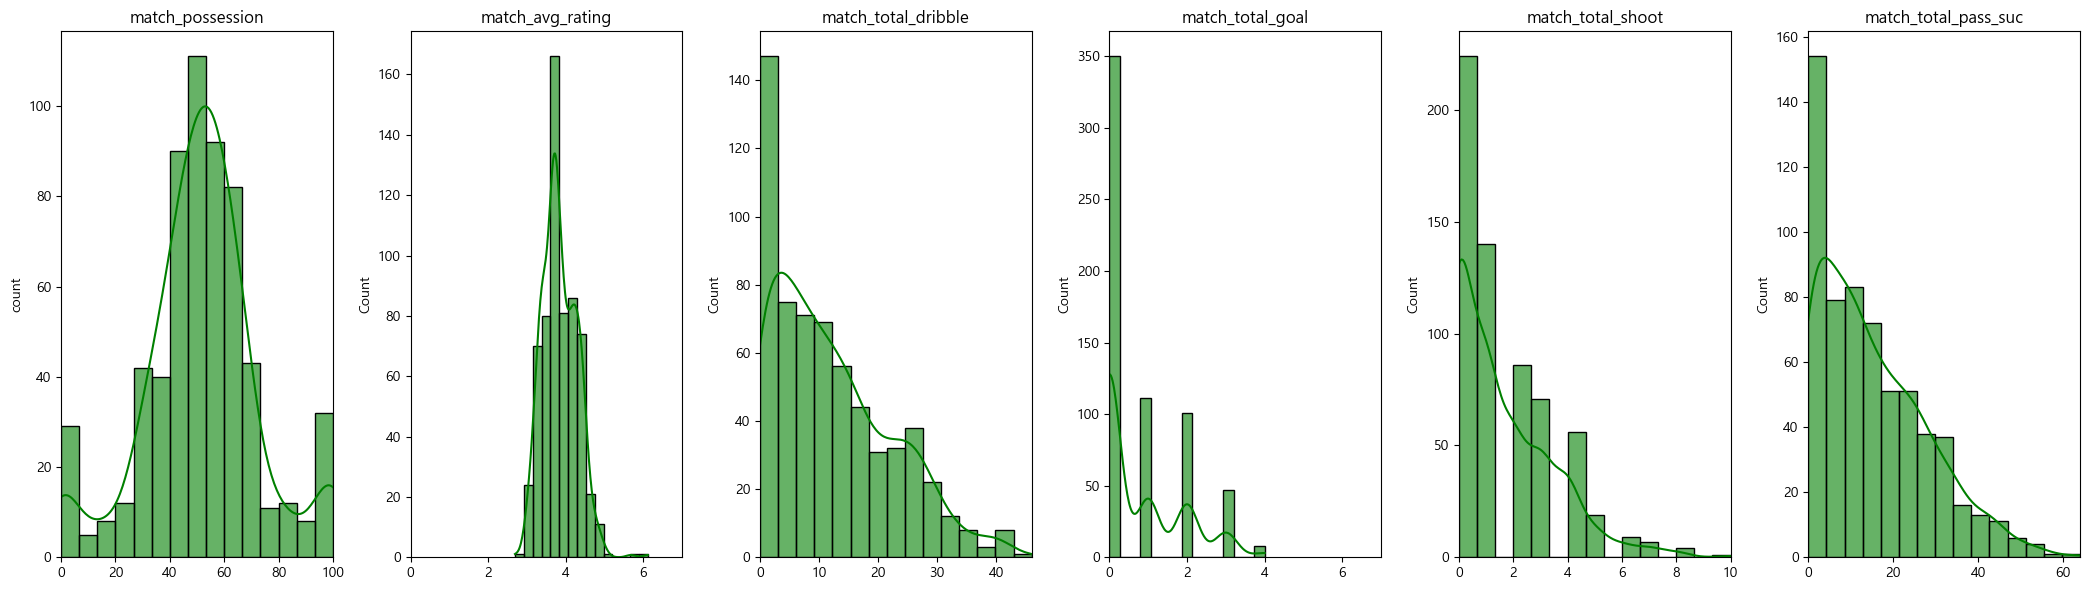

In [31]:
col_hist_all(df3, basic_col)

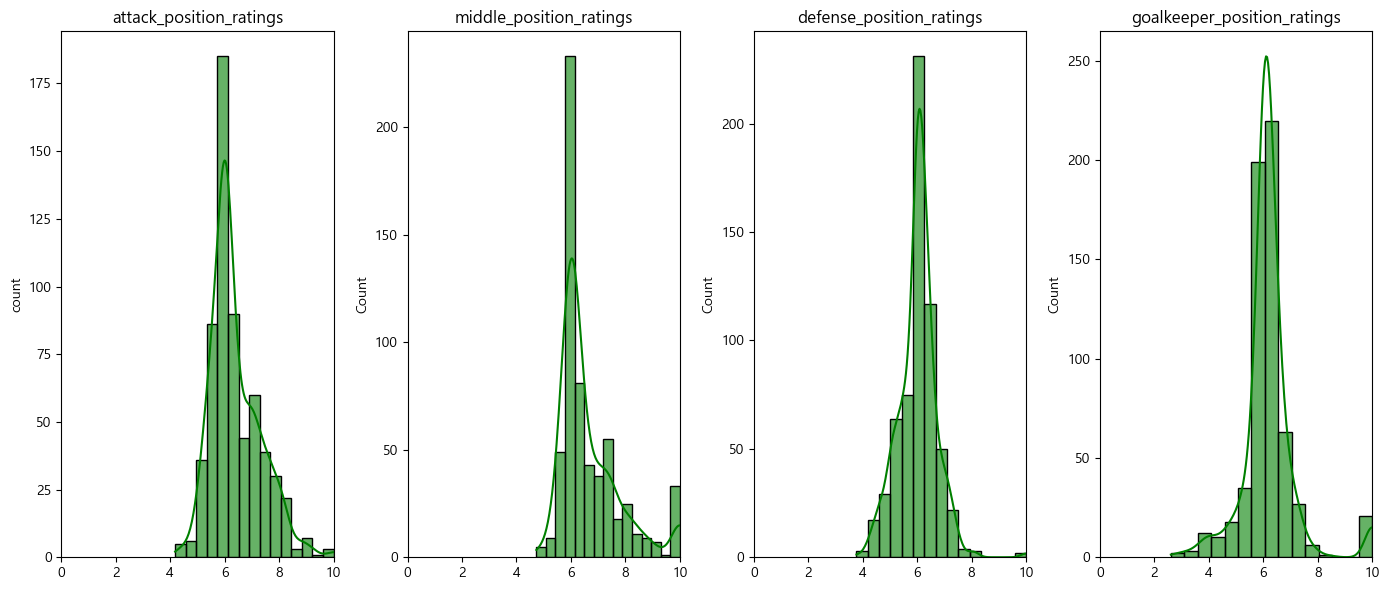

In [32]:
col_hist_all(df3, position_ratings_col)

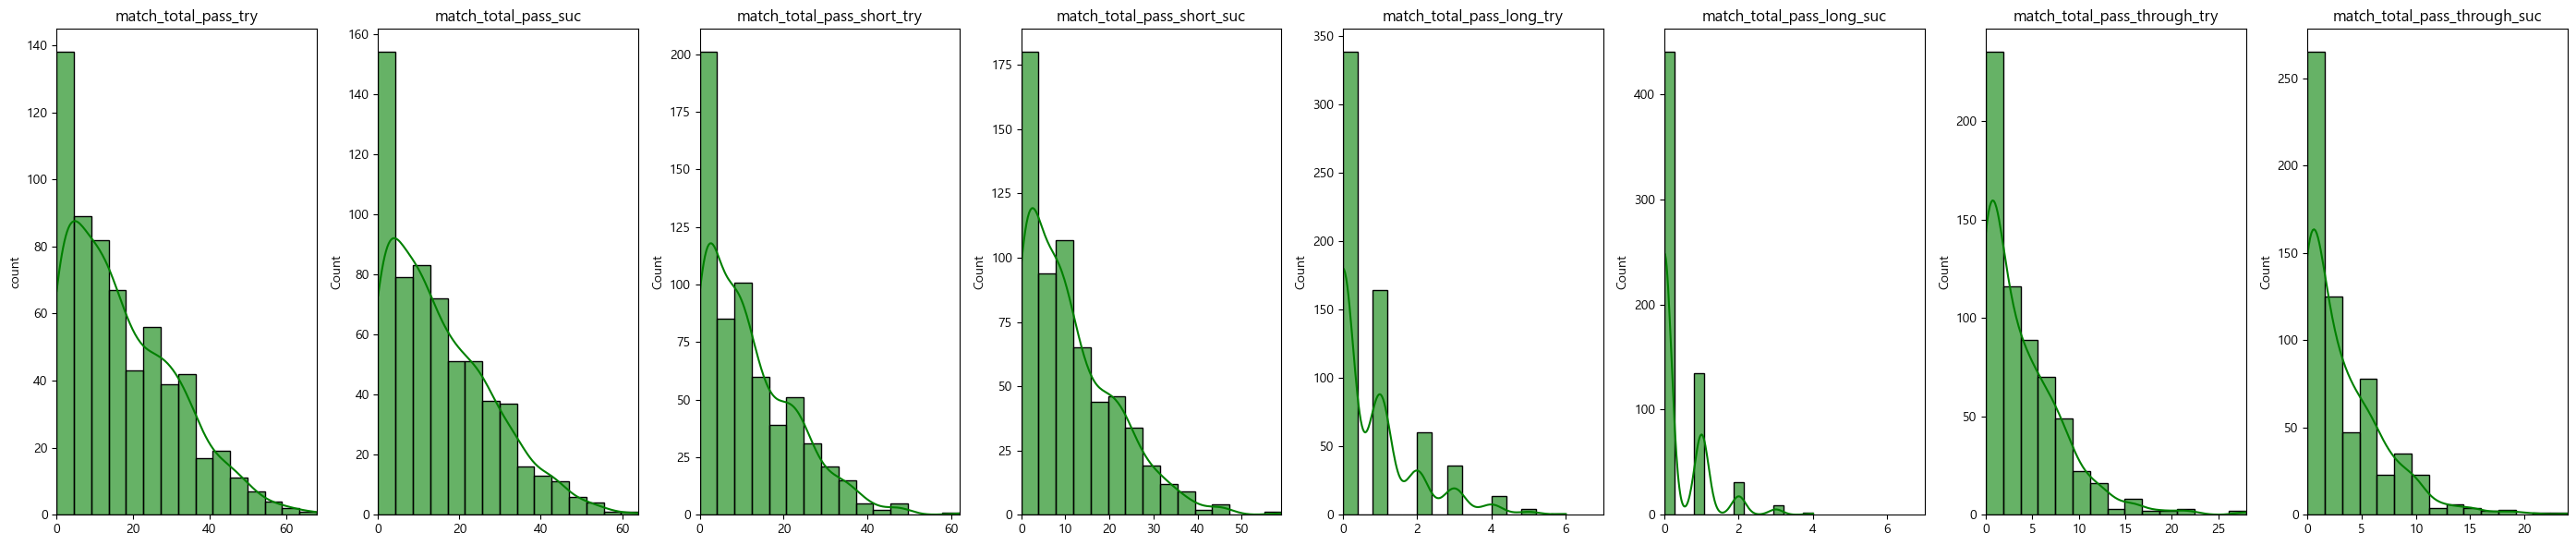

In [33]:
col_hist_all(df3, pass_col)

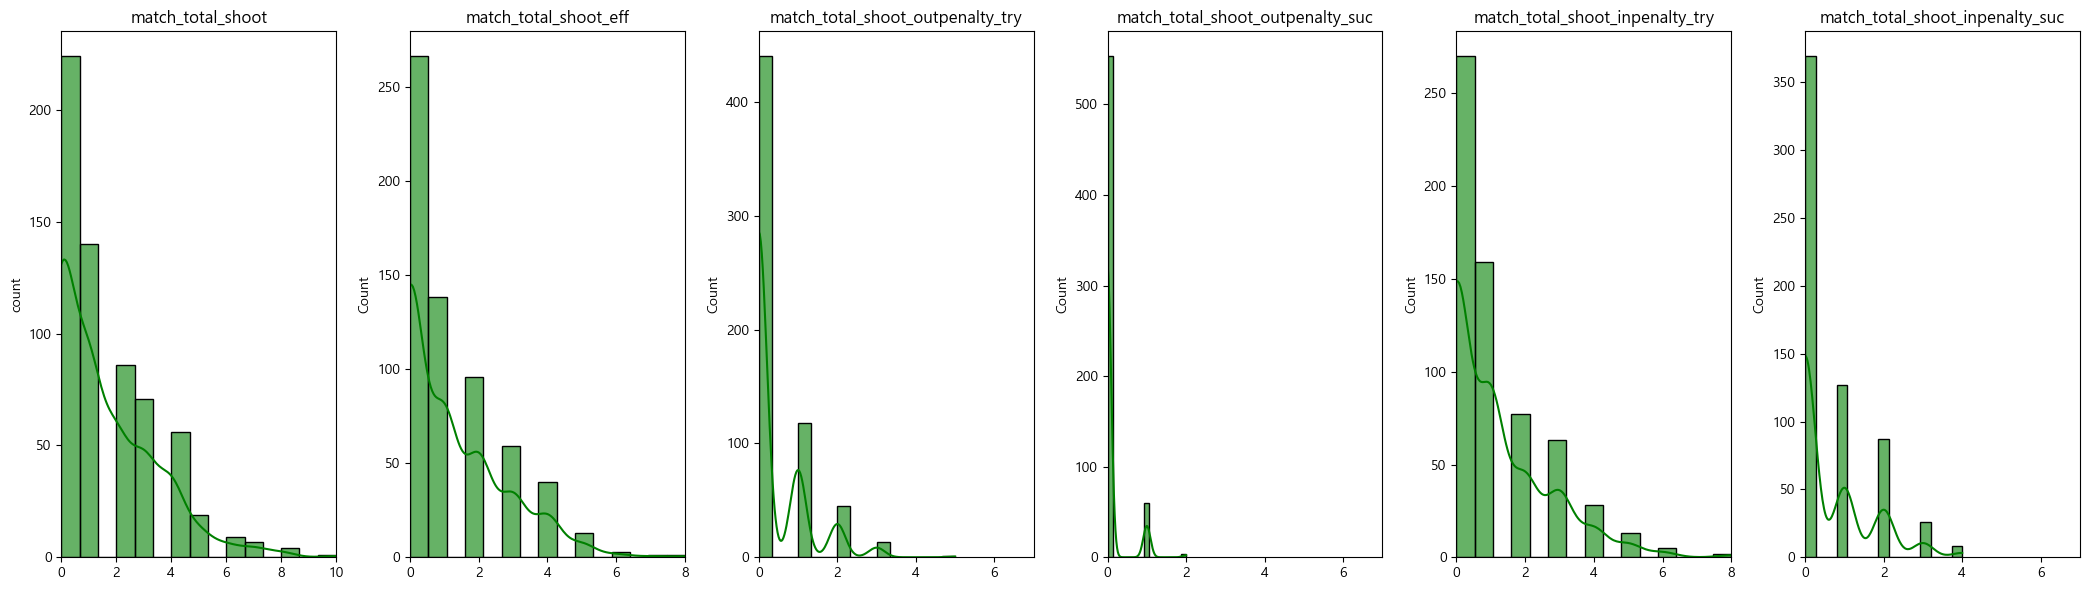

In [34]:
col_hist_all(df3, shoot_col)

---

## 경기 결과에 따른 Stat별 HIST

In [35]:
def col_hist(df_win, df_lose, col_name) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6))
                           
    if len(col_name) == 1:
        ax = [ax]
        
    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        min_val = 0
        max_val = max(df_win[col].max(), df_lose[col].max())
        
        bins = 15
        
        sns.histplot(df_win[col].values, color = 'blue', kde = True, ax = ax[idx], label = '승', 
                     bins = bins, alpha=0.6)
        sns.histplot(df_lose[col].values, color = 'red', kde = True, ax = ax[idx], label = '패', 
                     bins = bins, alpha=0.6)   
        
        ax[idx].set_title(col_name[idx])
        ax[idx].legend()
    
    plt.tight_layout()
    plt.show()

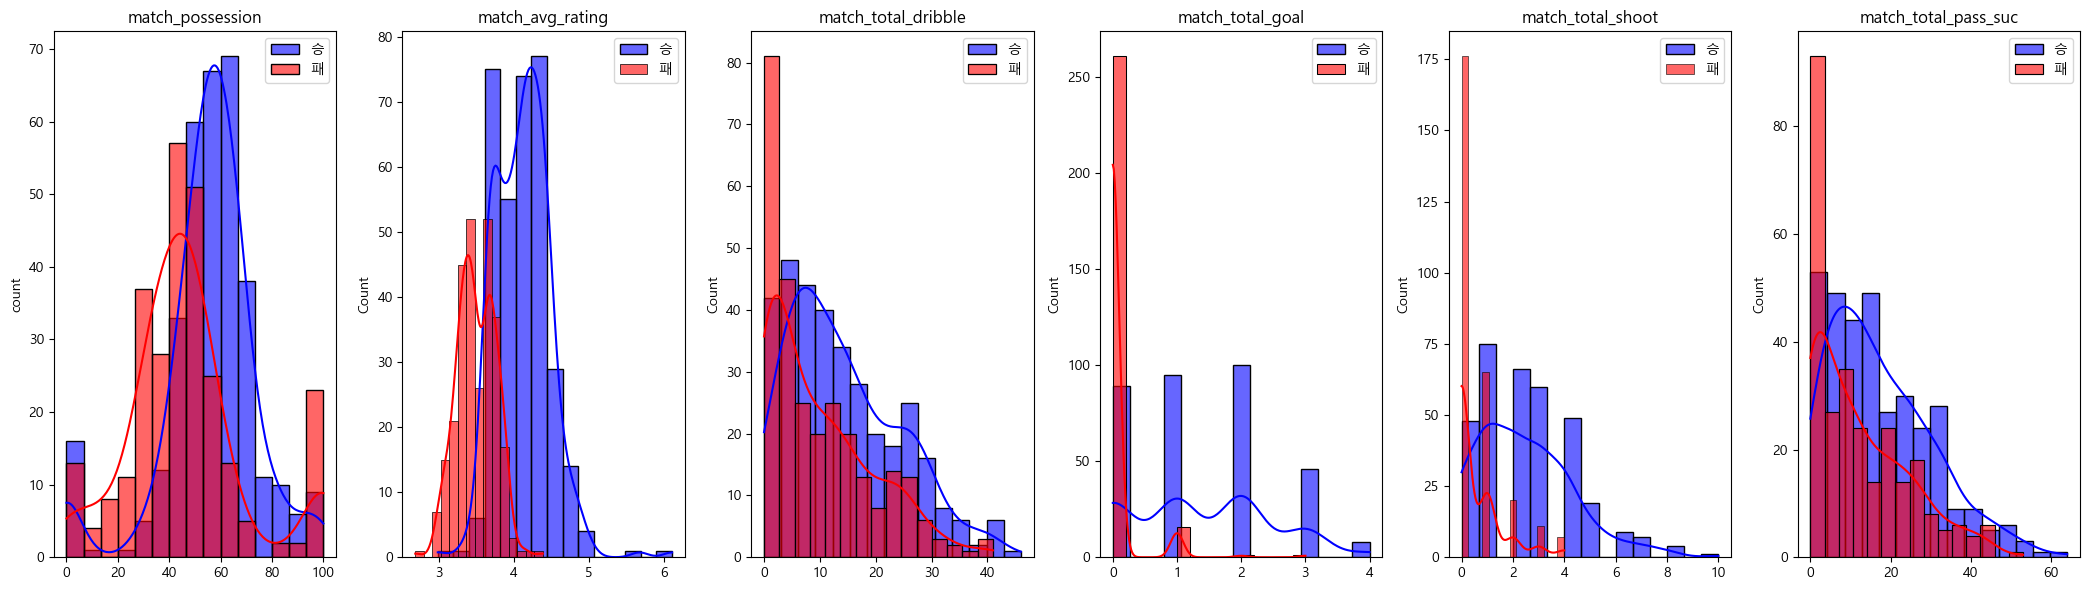

In [36]:
col_hist(df3_win, df3_lose, basic_col)

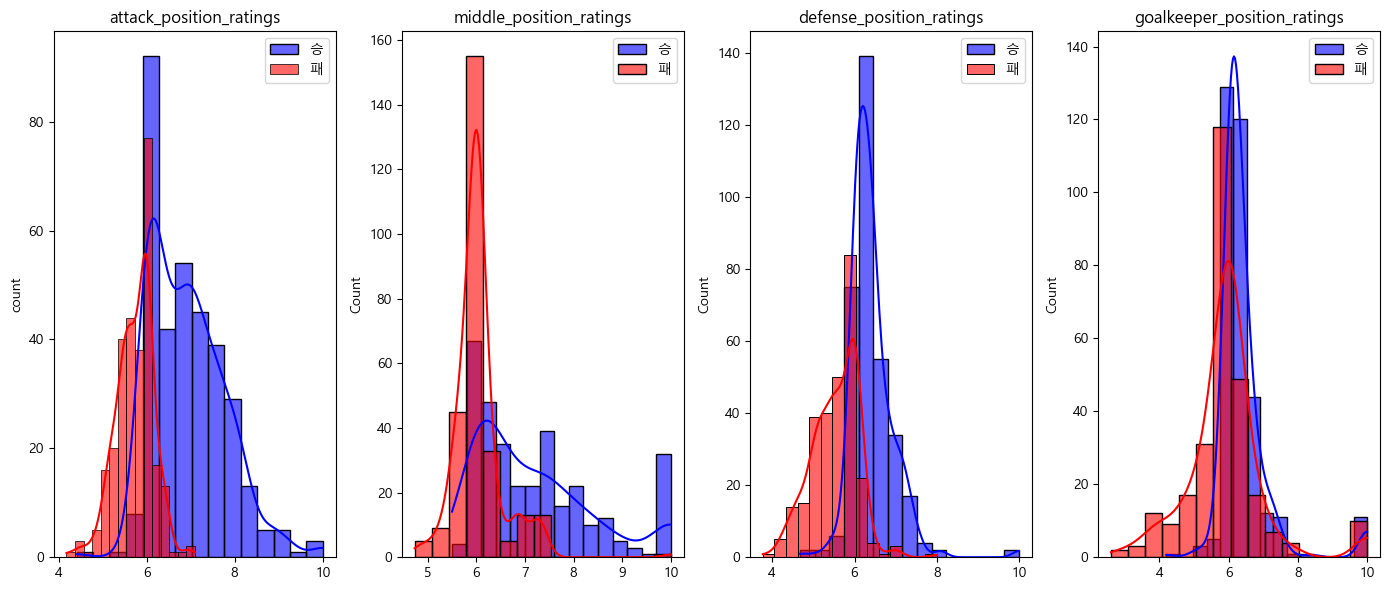

In [37]:
col_hist(df3_win, df3_lose, position_ratings_col)

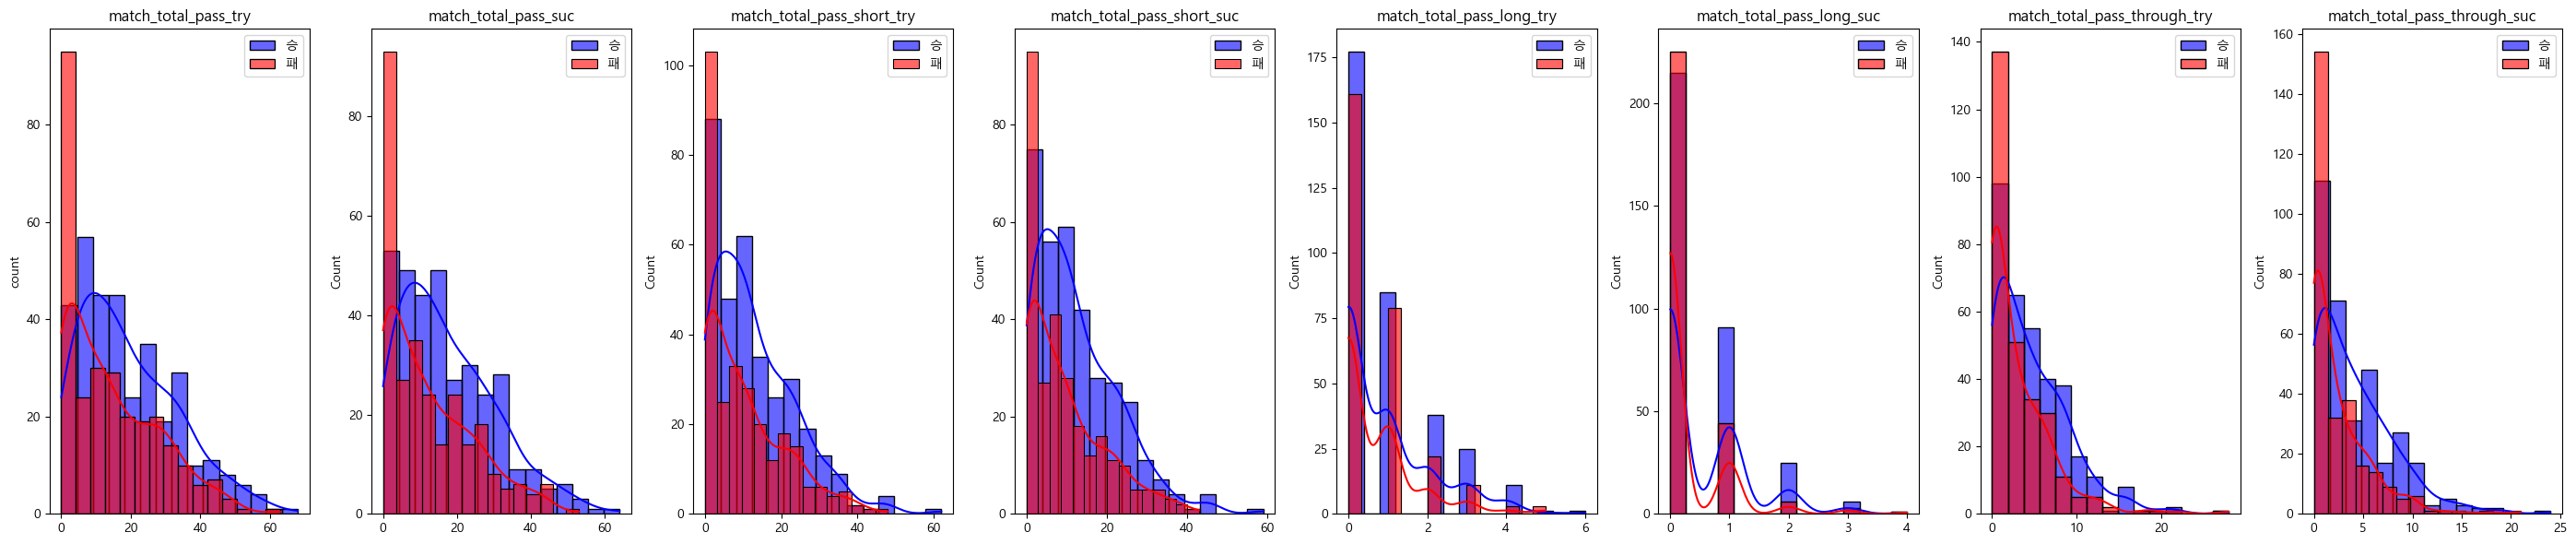

In [38]:
col_hist(df3_win, df3_lose, pass_col)

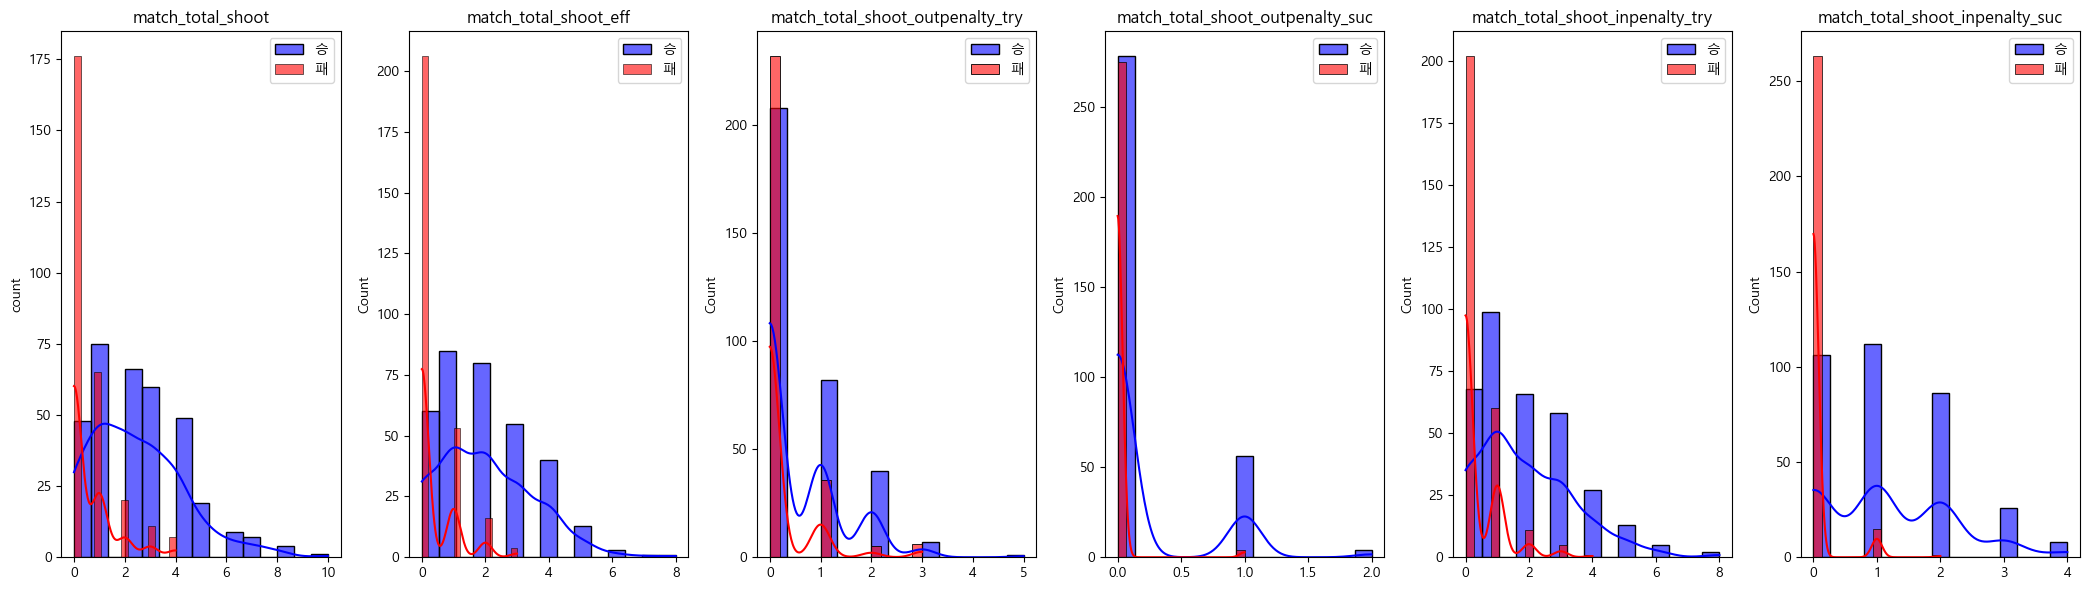

In [39]:
col_hist(df3_win, df3_lose, shoot_col)

## 경기 결과에 따른 Stat별  Box-Plot

In [40]:
def col_boxplot(df_win, df_lose, col_name, sharey_bool) : 

    title_list = ['승', '패']

    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6), 
                           sharey = sharey_bool)
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        data_to_plot = [df_win[col].values, df_lose[col].values]
        ax[idx].boxplot(data_to_plot, tick_labels = title_list);  

        ax[idx].set_xticks([i for i in range(1, len(title_list) + 1)])
        ax[idx].set_xticklabels(title_list)

        ax[idx].set_title(col_name[idx])

### 결과에 따른 Basic Stats

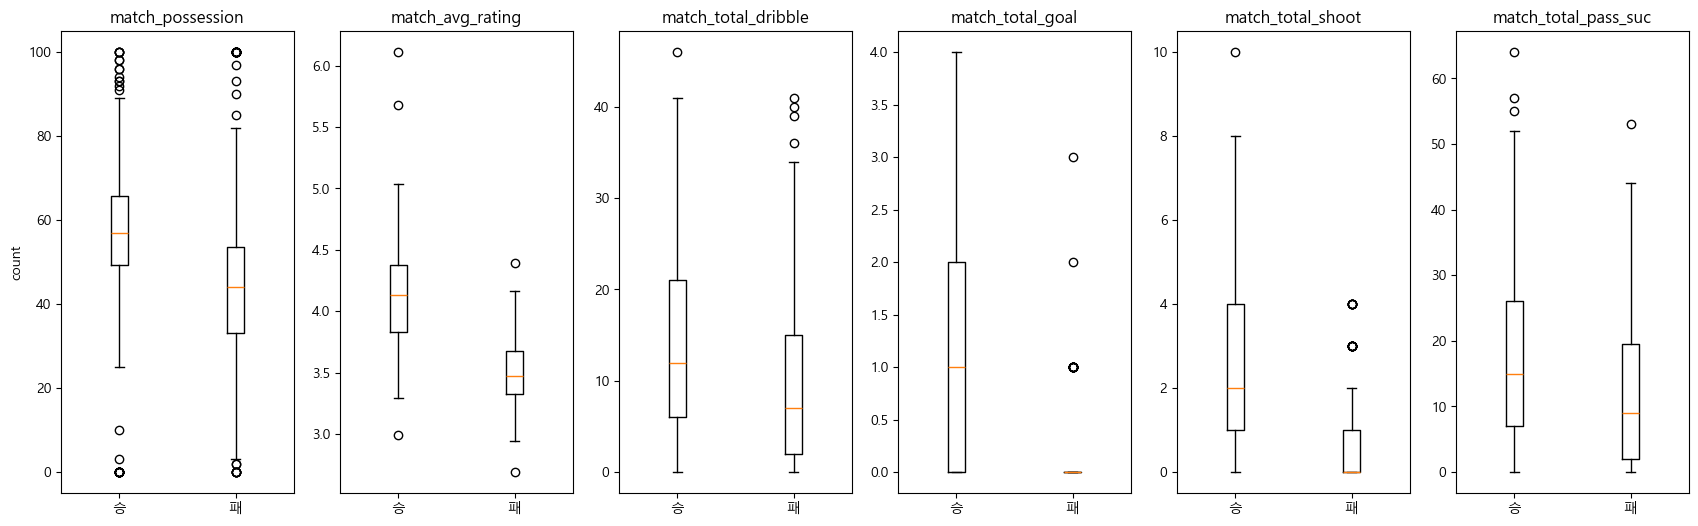

In [41]:
col_boxplot(df3_win, df3_lose, basic_col, False)

### 결과에 따른 Position 별 Ratings

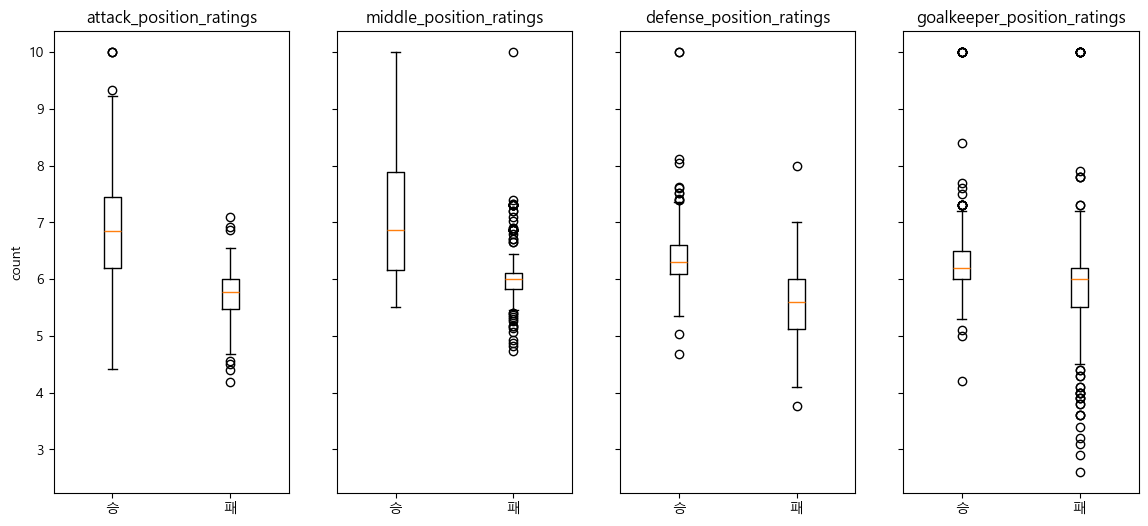

In [42]:
col_boxplot(df3_win, df3_lose, position_ratings_col, True)

### 경기 결과에 따른 Pass stats

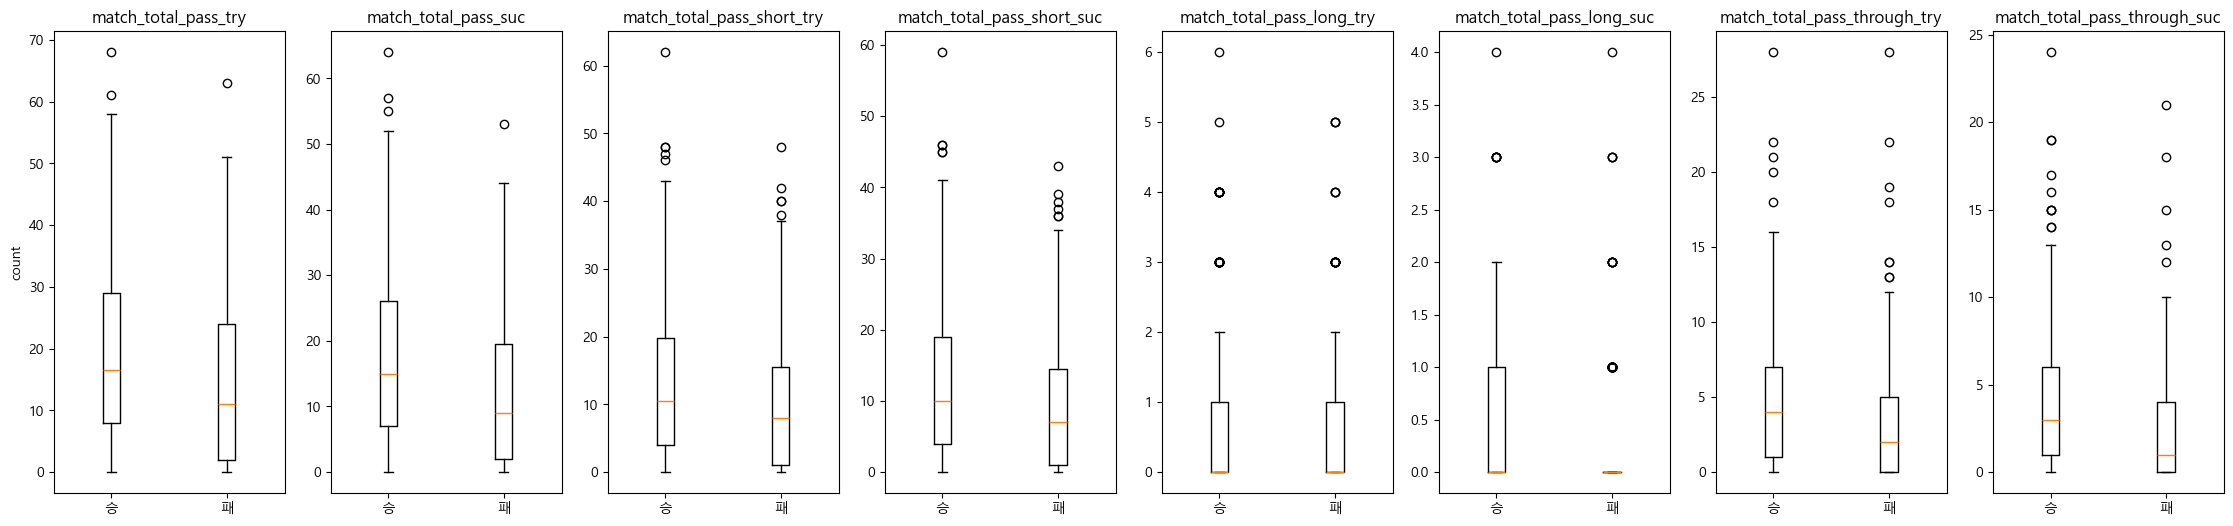

In [45]:
col_boxplot(df3_win, df3_lose, pass_col, False)

### 경기 결과에 따른 Shoot stats

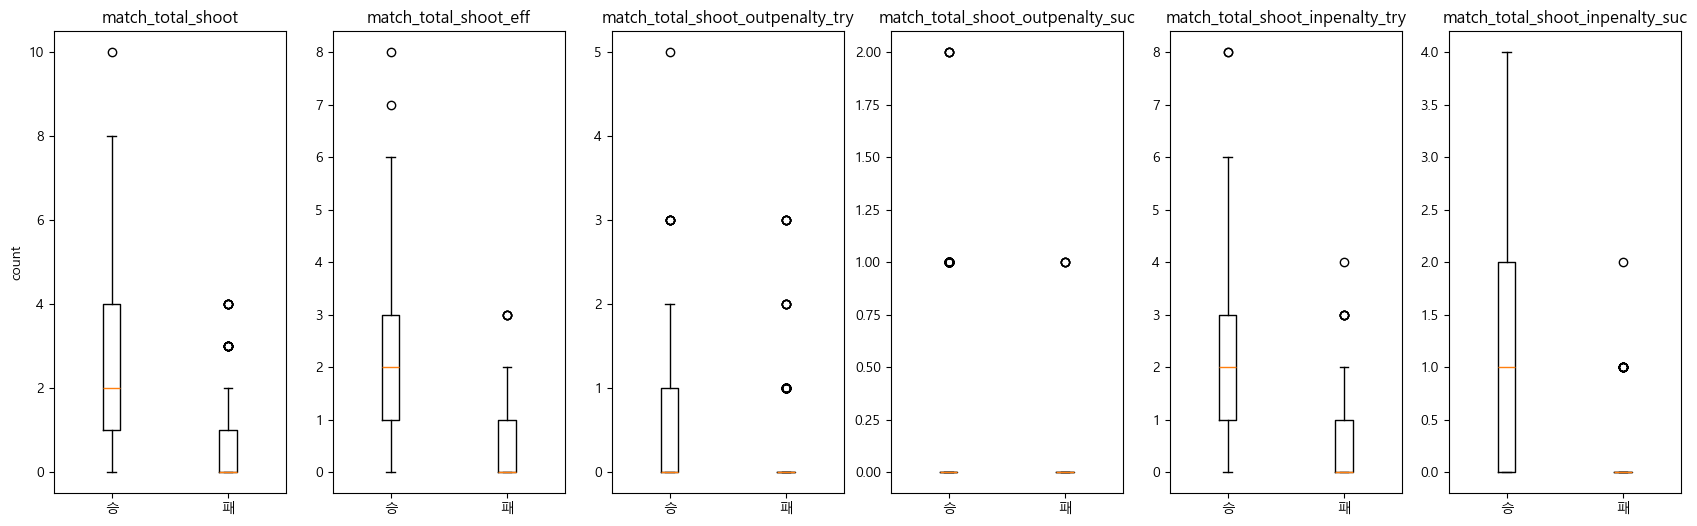

In [46]:
col_boxplot(df3_win, df3_lose, shoot_col, False)

---

In [47]:
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu, kstest, norm, probplot

from sklearn.preprocessing import power_transform

In [67]:
df3_qq = df3.copy()

## Stat별 QQ plot

In [68]:
def col_qqplot_all(df, col_name) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6))
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        stats.probplot(df[col], dist = "norm", plot = ax[idx])
        
        ax[idx].set_title(col_name[idx])

    plt.tight_layout()
    plt.show()

In [69]:
def col_qqplot_norm_all(df, col_name) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6))
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')
    
    for idx, col in enumerate(col_name):
        df[col] = power_transform(df[col].values.reshape(-1, 1), method = 'yeo-johnson')

        stats.probplot(df[col], dist = "norm", plot = ax[idx])
        
        ax[idx].set_title(col_name[idx])

    plt.tight_layout()
    plt.show()

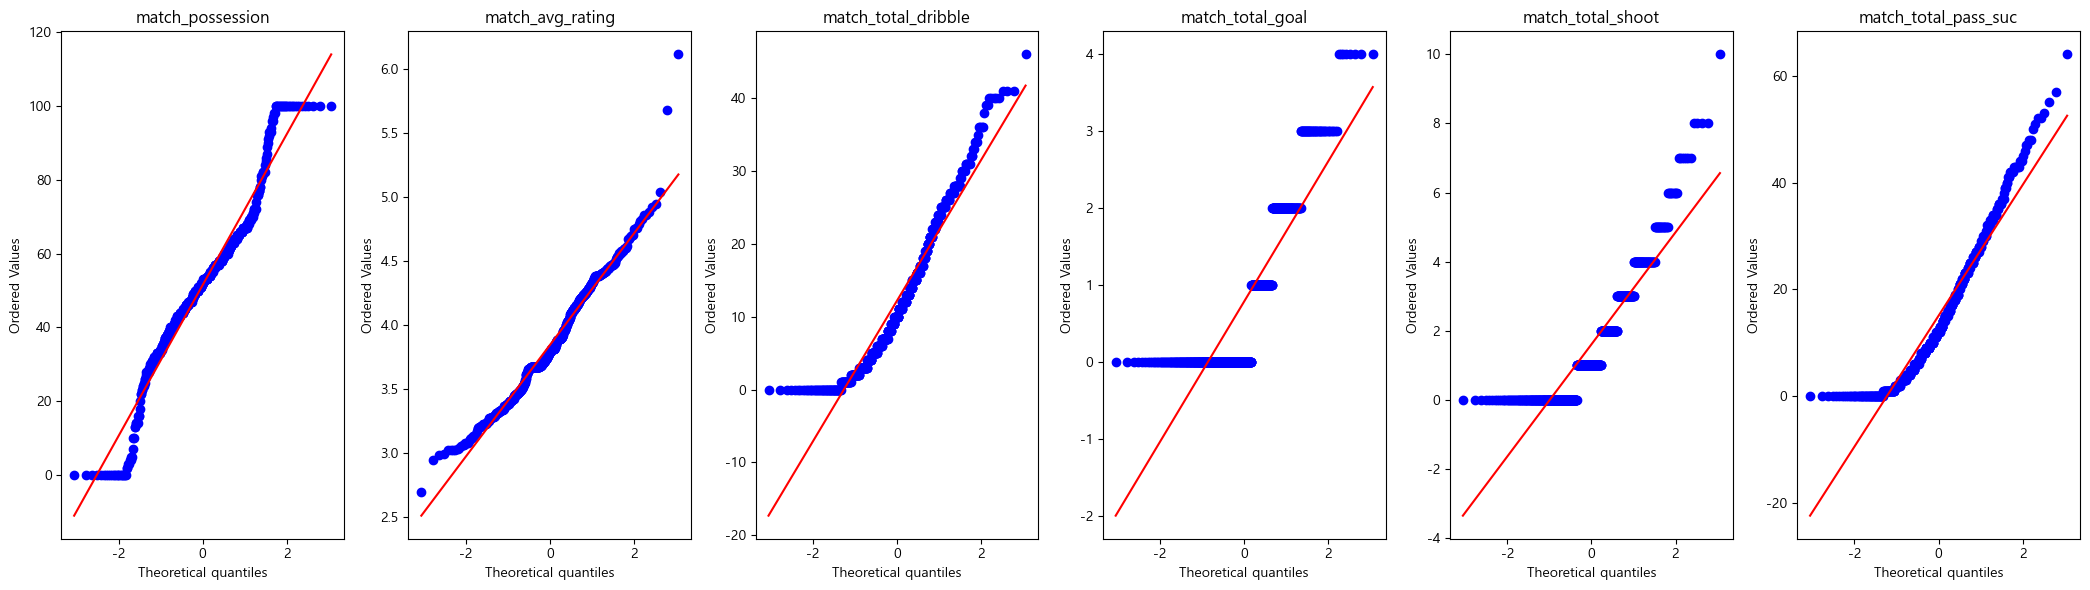

In [70]:
col_qqplot_all(df3, basic_col)

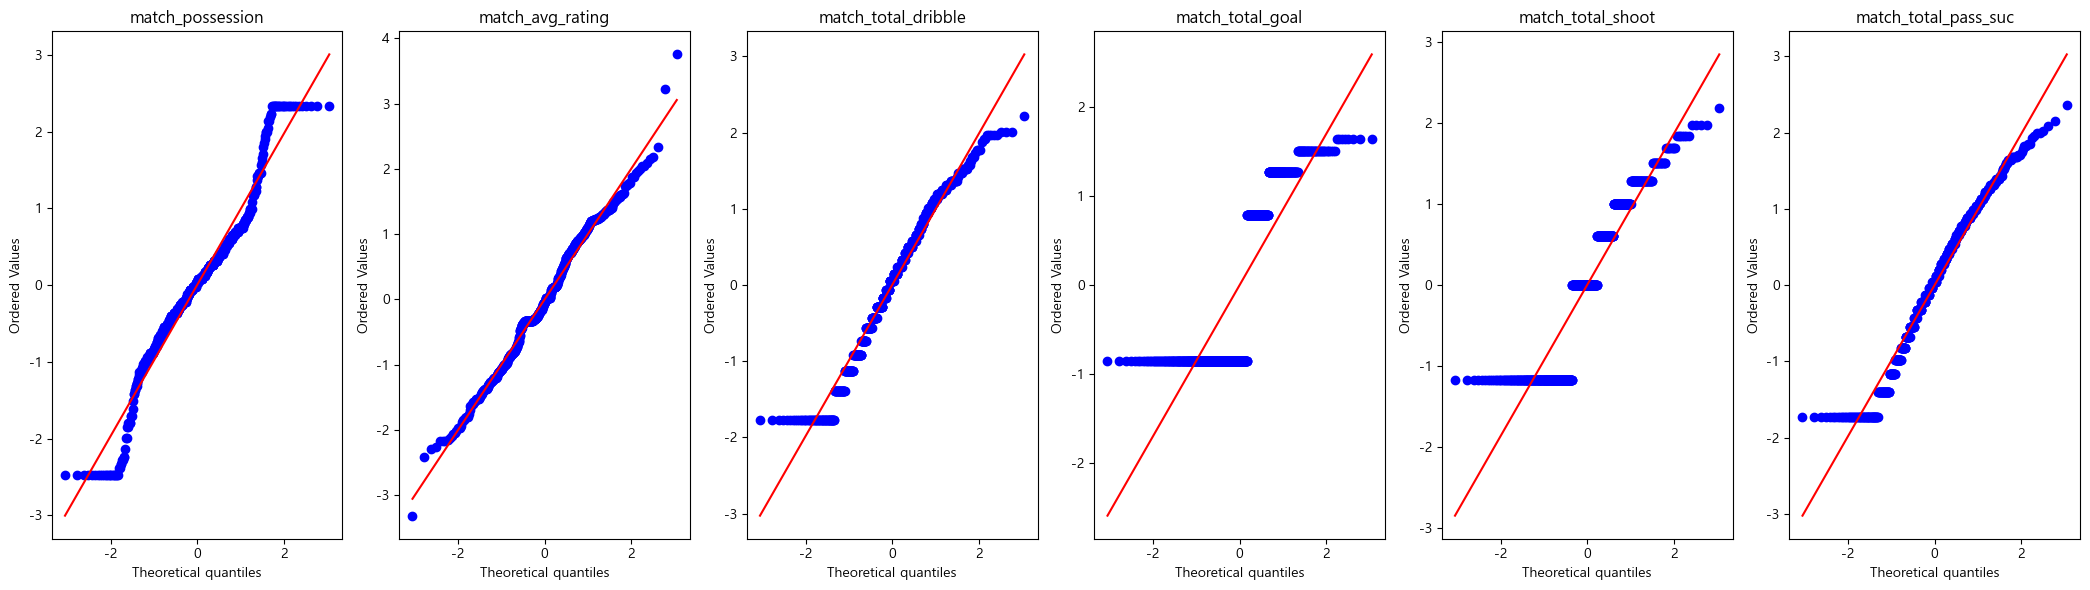

In [71]:
col_qqplot_norm_all(df3_qq, basic_col)

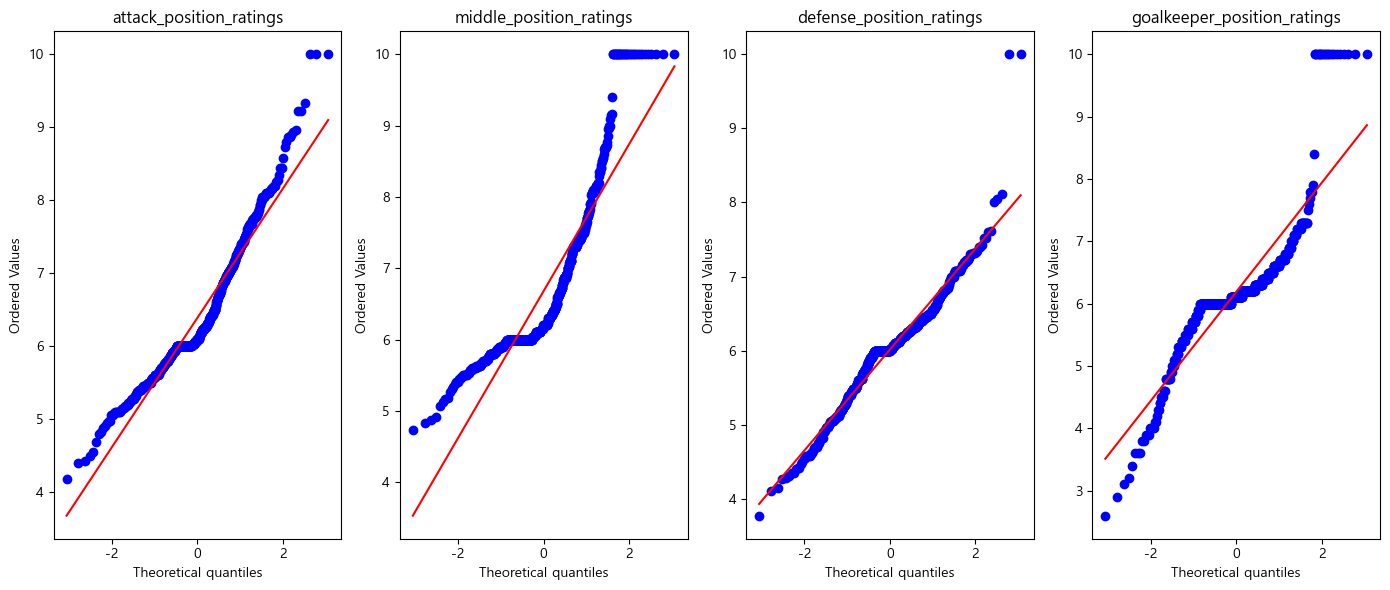

In [72]:
col_qqplot_all(df3, position_ratings_col)

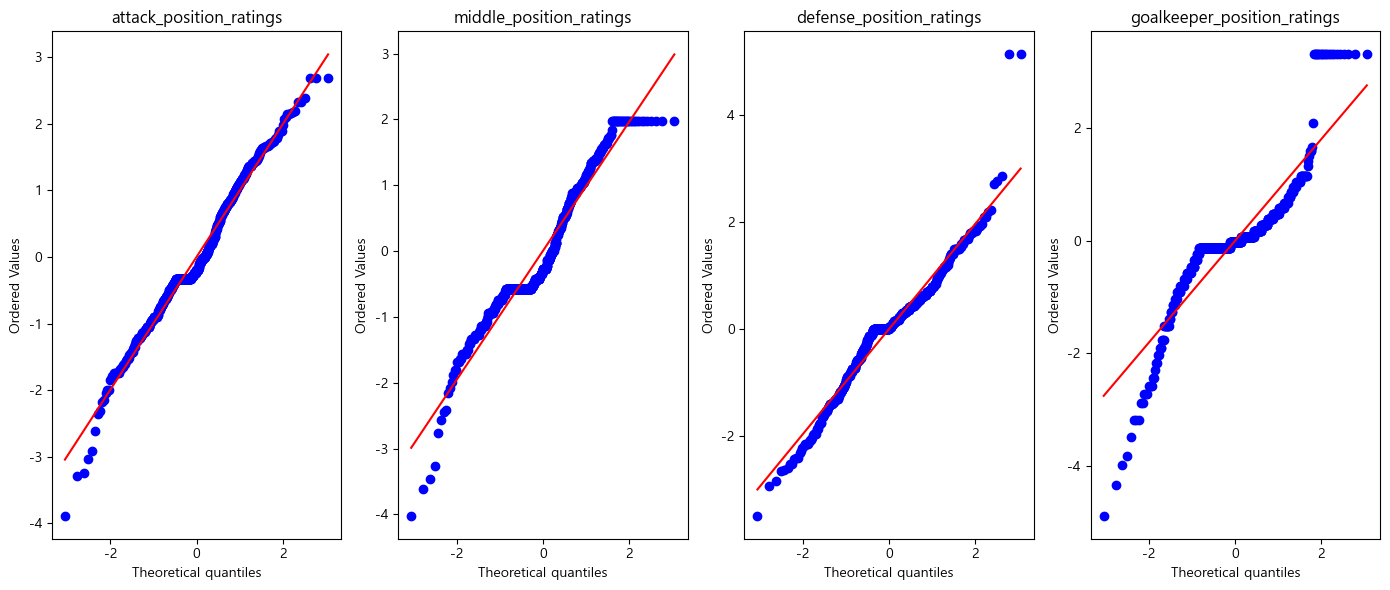

In [73]:
col_qqplot_norm_all(df3_qq, position_ratings_col)

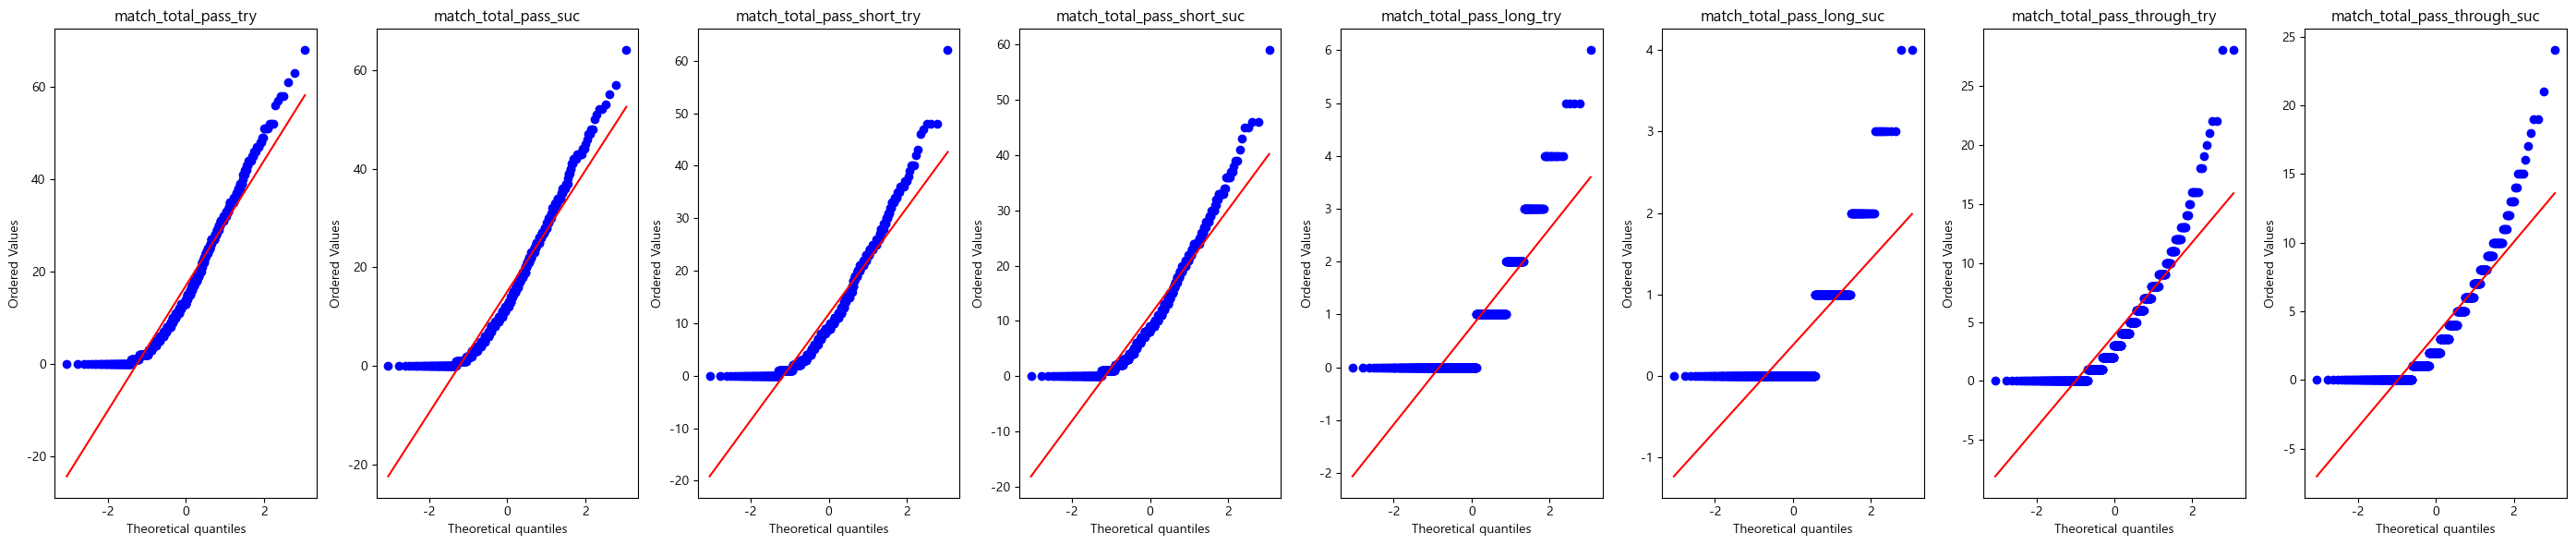

In [74]:
col_qqplot_all(df3, pass_col)

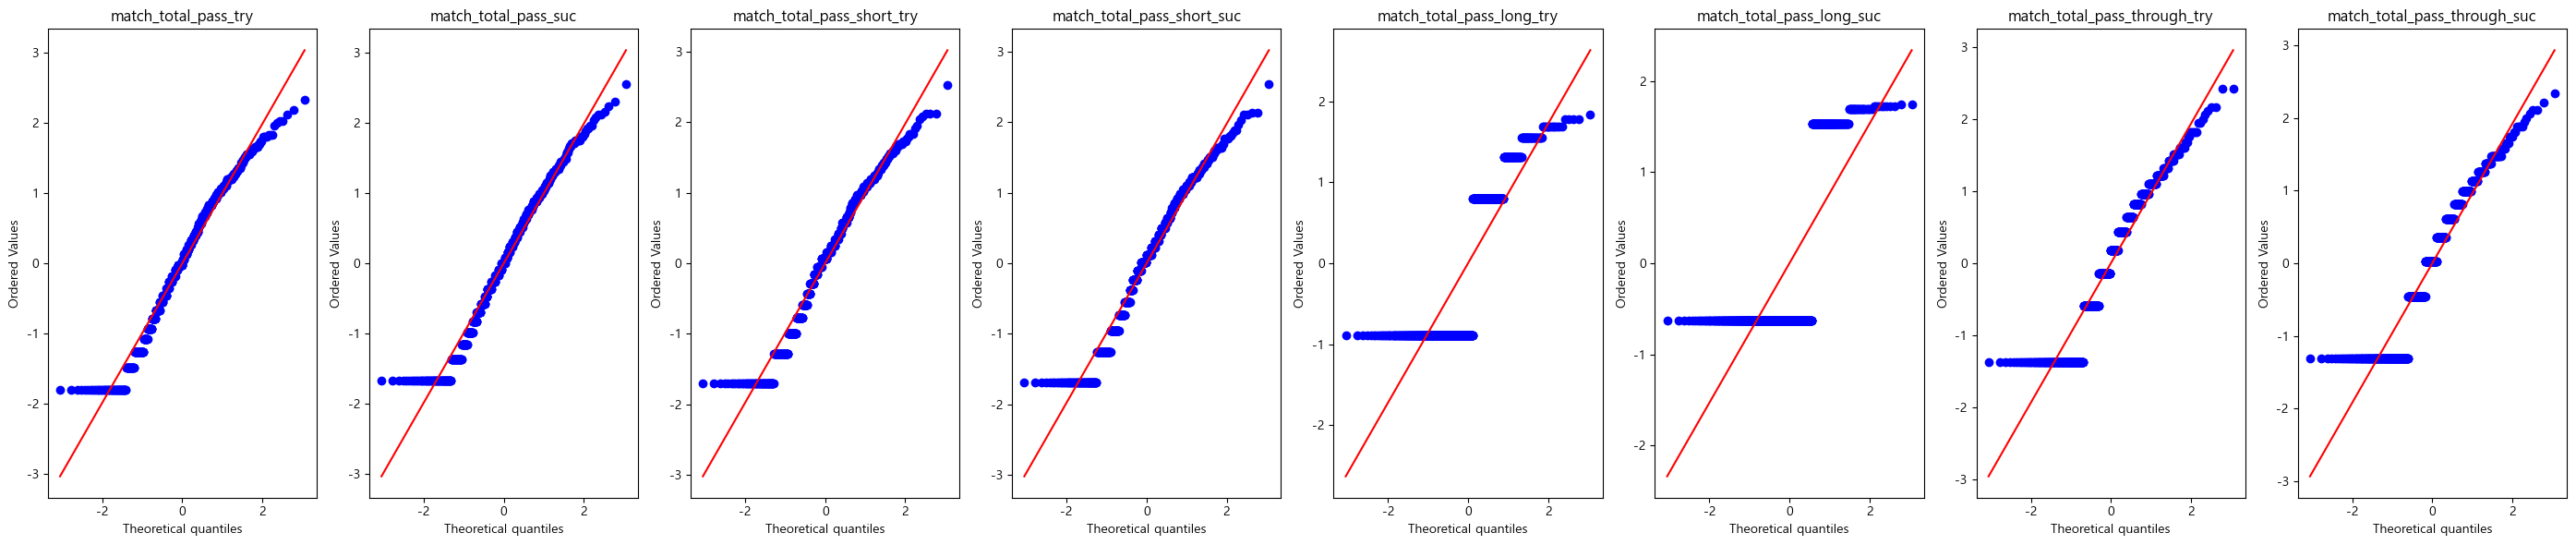

In [75]:
col_qqplot_norm_all(df3_qq, pass_col)

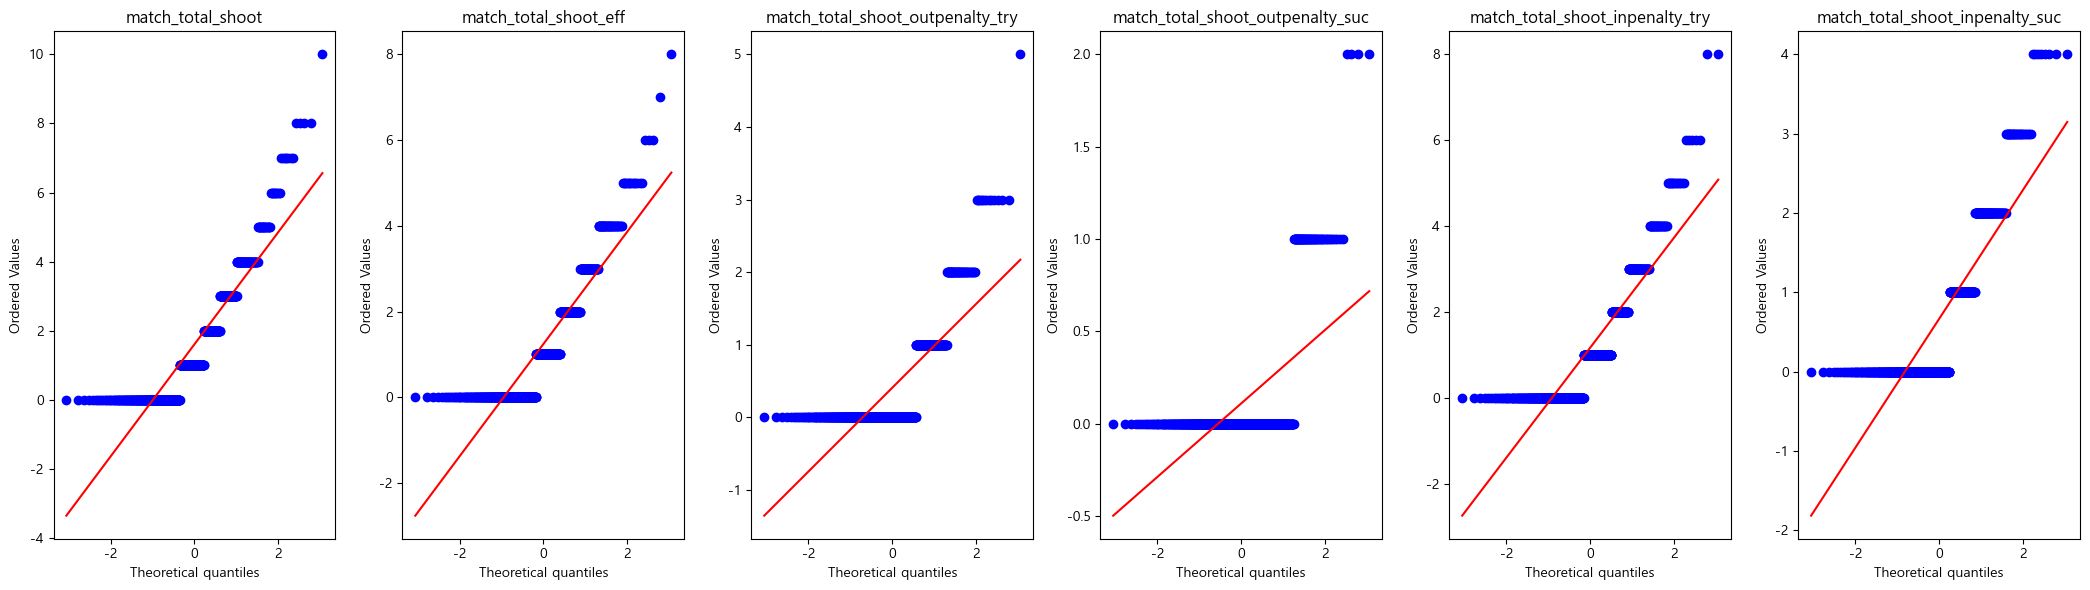

In [76]:
col_qqplot_all(df3, shoot_col)

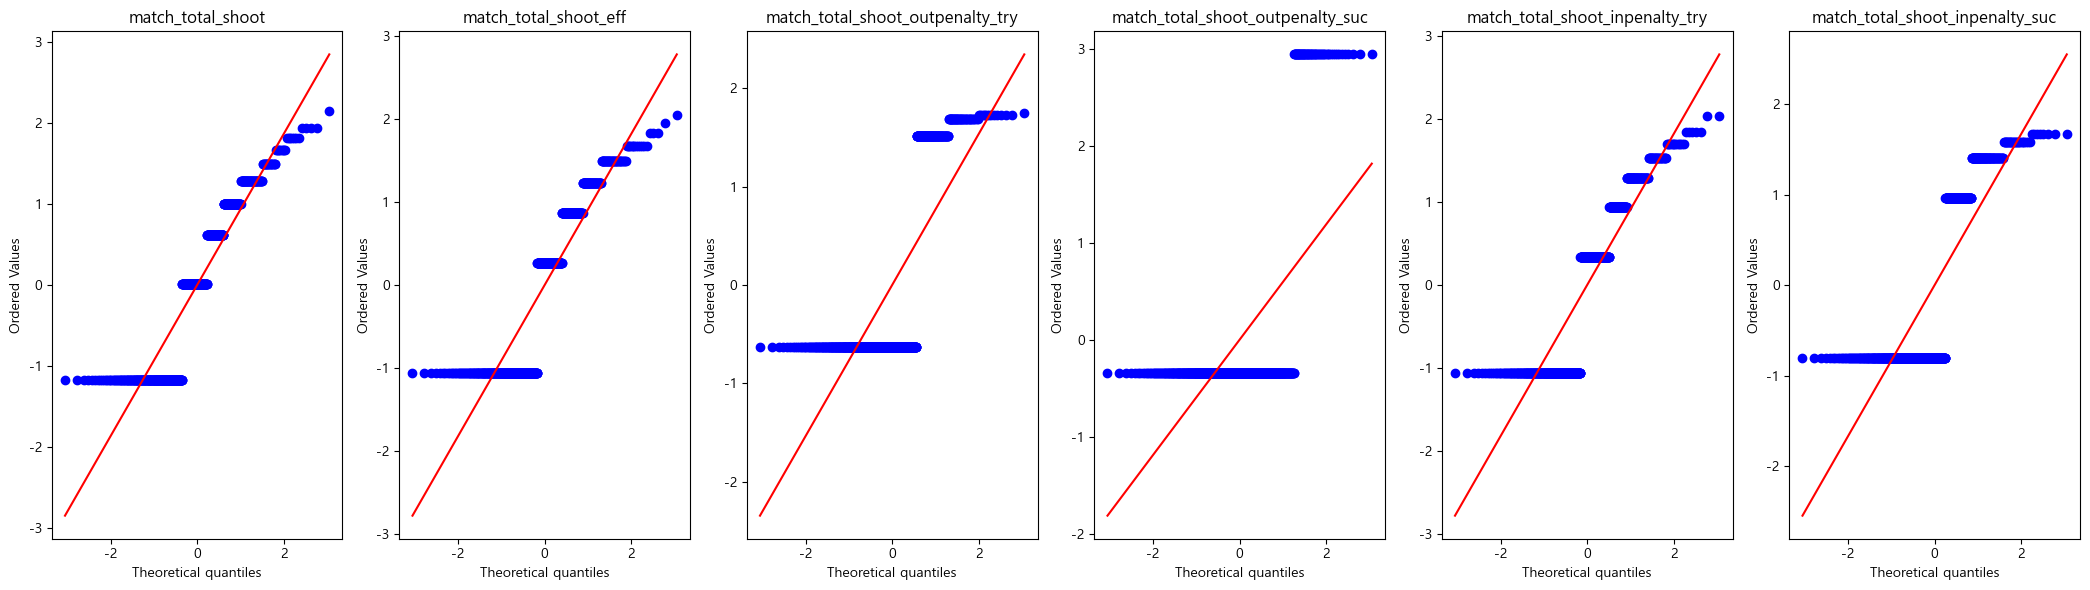

In [77]:
col_qqplot_norm_all(df3_qq, shoot_col)

In [79]:
df3_qq_win = df3_qq[df3_qq['match_result'] == '승']
df3_qq_lose = df3_qq[df3_qq['match_result'] == '패']

---

---

In [80]:
# 1. 정규성 검정 (Shapiro-Wilk test)
def normality_test(df, df_win, df_lose, columns):
    columns_normality_O = []
    columns_normality_X = []
    
    columns_homogeneity_O = []
    columns_homogeneity_X = []

    for col in columns:
        stat_shap, p_val_shap = shapiro(df[col])
        stat_win_shap, p_val_win_shap = shapiro(df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(df_lose[col])
        
        stat_kosm, p_val_kosm = kstest(df[col], 'norm', args = (df[col].mean(), df[col].std()))
        stat_win_kosm, p_val_win_kosm = kstest(df_win[col], 'norm', args = (df_win[col].mean(), df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(df_lose[col], 'norm', args = (df_lose[col].mean(), df_lose[col].std()))
        
        stat, p_val = levene(df_win[col], df_lose[col])

        print(f'{col} \n 정규성 검정: \n 전체: p-value={p_val_shap} \
                                     \n 승: p-value={p_val_win_shap, p_val_win_kosm} \
                                     \n 패: p-value={p_val_lose_shap, p_val_lose_kosm} \
                                     \n Levene’s test p-value={p_val}')
              
        if p_val_shap > 0.05 or (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05):
            columns_normality_O.append(col) 

        else:
            if p_val_kosm > 0.05 or (p_val_win_kosm > 0.05 and p_val_lose_kosm) > 0.05:
                columns_normality_O.append(col)  

            else:
                columns_normality_X.append(col) 

        # 등분산성 검정 결과
        if p_val > 0.05:
            columns_homogeneity_O.append(col)  
            
        else:
            columns_homogeneity_X.append(col) 

    print('-----------------------------------------------------')
    print(f"정규분포 O: \n {', '.join(columns_normality_O)}")
    print('-----------------------------------------------------')
    print(f"정규분포 X: \n {', '.join(columns_normality_X)}")
    print('-----------------------------------------------------')
    print(f"등분산성 O: \n {', '.join(columns_homogeneity_O)}")
    print('-----------------------------------------------------')
    print(f"등분산성 X: \n {', '.join(columns_homogeneity_X)}")
    print('-----------------------------------------------------')

In [81]:
normality_test(df3, df3_win, df3_lose, basic_col)

match_possession 
 정규성 검정: 
 전체: p-value=2.8897382320829137e-12                                      
 승: p-value=(4.312937636017432e-14, 4.600481517226662e-05)                                      
 패: p-value=(1.6920590896507143e-11, 0.00021992861906716338)                                      
 Levene’s test p-value=0.004733281948333293
match_avg_rating 
 정규성 검정: 
 전체: p-value=2.7394272147366244e-08                                      
 승: p-value=(1.4215352767736935e-08, 0.12495881472149162)                                      
 패: p-value=(0.013916240966764306, 0.02907455573383455)                                      
 Levene’s test p-value=1.7755655266829719e-06
match_total_dribble 
 정규성 검정: 
 전체: p-value=7.381671950477481e-17                                      
 승: p-value=(8.09796991893131e-10, 0.0009152444706329575)                                      
 패: p-value=(1.1505563755174799e-13, 7.684414876298229e-06)                                      
 Levene’s test p-value

In [83]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, basic_col)

match_possession 
 정규성 검정: 
 전체: p-value=2.7564186745556042e-12                                      
 승: p-value=(3.8434777506810925e-14, 4.336299152117258e-05)                                      
 패: p-value=(1.8160961523488366e-11, 0.00022626012267126469)                                      
 Levene’s test p-value=0.004707082777208539
match_avg_rating 
 정규성 검정: 
 전체: p-value=0.0008020429538137551                                      
 승: p-value=(1.7030759384807713e-05, 0.3504219711856186)                                      
 패: p-value=(0.003754785048843195, 0.010885102172449352)                                      
 Levene’s test p-value=0.2487410322292647
match_total_dribble 
 정규성 검정: 
 전체: p-value=7.716095142104917e-10                                      
 승: p-value=(3.0383915541330005e-05, 0.4292268328906632)                                      
 패: p-value=(5.704989598485064e-08, 0.001901712022331367)                                      
 Levene’s test p-value=0.0024

In [85]:
normality_test(df3, df3_win, df3_lose, position_ratings_col)

attack_position_ratings 
 정규성 검정: 
 전체: p-value=4.765481321038116e-15                                      
 승: p-value=(2.3803844934528686e-10, 0.006510984689572867)                                      
 패: p-value=(0.00021598883965233003, 0.003583285350684409)                                      
 Levene’s test p-value=3.513806660813624e-23
middle_position_ratings 
 정규성 검정: 
 전체: p-value=6.760412810461146e-26                                      
 승: p-value=(4.588858062659291e-16, 7.883741604976344e-05)                                      
 패: p-value=(9.186480695665206e-18, 2.6952249015647053e-12)                                      
 Levene’s test p-value=1.6593053829235388e-32
defense_position_ratings 
 정규성 검정: 
 전체: p-value=7.582344480032464e-13                                      
 승: p-value=(7.763340088700845e-18, 3.483708969687384e-06)                                      
 패: p-value=(5.579998492319144e-07, 0.003178791219113094)                                      
 L

In [86]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, position_ratings_col)

attack_position_ratings 
 정규성 검정: 
 전체: p-value=2.2369850578803e-06                                      
 승: p-value=(8.362100883847549e-08, 0.01941230207300083)                                      
 패: p-value=(1.8469148387806432e-09, 0.0021045959945568222)                                      
 Levene’s test p-value=1.0005299459518745e-05
middle_position_ratings 
 정규성 검정: 
 전체: p-value=6.629609063977942e-14                                      
 승: p-value=(7.202591213356704e-10, 0.0025321088867731045)                                      
 패: p-value=(7.299736081988426e-13, 6.627713730863839e-07)                                      
 Levene’s test p-value=7.373671397119957e-15
defense_position_ratings 
 정규성 검정: 
 전체: p-value=7.100427529336312e-12                                      
 승: p-value=(2.9431059244017874e-16, 1.6072501265252164e-05)                                      
 패: p-value=(4.034026327048168e-07, 0.0025934796343580237)                                      
 Le

In [87]:
normality_test(df3, df3_win, df3_lose, pass_col)

match_total_pass_try 
 정규성 검정: 
 전체: p-value=1.1352046074076007e-16                                      
 승: p-value=(3.4187328789248877e-10, 0.002033207909376517)                                      
 패: p-value=(7.512066467448878e-13, 2.8310465926748147e-05)                                      
 Levene’s test p-value=0.32851889285910274
match_total_pass_suc 
 정규성 검정: 
 전체: p-value=2.705227531988361e-17                                      
 승: p-value=(1.8387629445187433e-10, 0.003044791422358565)                                      
 패: p-value=(1.5675468940152686e-13, 5.730689468276837e-06)                                      
 Levene’s test p-value=0.15853795927351616
match_total_pass_short_try 
 정규성 검정: 
 전체: p-value=8.284313510657549e-20                                      
 승: p-value=(3.228237009888272e-13, 5.9969942572942916e-05)                                      
 패: p-value=(1.3215290329901443e-14, 8.234936263414477e-07)                                      
 Leven

In [88]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, pass_col)

match_total_pass_try 
 정규성 검정: 
 전체: p-value=2.2406314335891126e-09                                      
 승: p-value=(0.00019279317596038314, 0.35214570239134435)                                      
 패: p-value=(8.731115838412793e-08, 0.0026646007796080106)                                      
 Levene’s test p-value=0.007476668564554185
match_total_pass_suc 
 정규성 검정: 
 전체: p-value=2.7605981073972074e-09                                      
 승: p-value=(0.002542286800425659, 0.5581852747193446)                                      
 패: p-value=(1.8066663341228957e-08, 0.003986908671651374)                                      
 Levene’s test p-value=0.030053701147470253
match_total_pass_short_try 
 정규성 검정: 
 전체: p-value=1.2796923746993117e-10                                      
 승: p-value=(0.0001591094430506106, 0.19108434617865644)                                      
 패: p-value=(9.388944492955721e-09, 0.00032677768601003924)                                      
 Levene’s te

In [89]:
normality_test(df3, df3_win, df3_lose, shoot_col)

match_total_shoot 
 정규성 검정: 
 전체: p-value=8.220714900301829e-25                                      
 승: p-value=(2.396816303743747e-12, 2.7992405030974704e-07)                                      
 패: p-value=(2.9807753871968014e-23, 2.153278209746831e-33)                                      
 Levene’s test p-value=1.006629170159218e-19
match_total_shoot_eff 
 정규성 검정: 
 전체: p-value=3.993927623469978e-26                                      
 승: p-value=(1.6967250366806666e-12, 4.755451218382875e-09)                                      
 패: p-value=(2.0376482518791725e-25, 7.909390852653839e-50)                                      
 Levene’s test p-value=2.252404725016466e-33
match_total_shoot_outpenalty_try 
 정규성 검정: 
 전체: p-value=3.3659896296306125e-35                                      
 승: p-value=(2.794127155762262e-24, 2.30949514952075e-41)                                      
 패: p-value=(1.3824485460416613e-28, 1.137530515529467e-60)                                     

In [91]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, shoot_col)

match_total_shoot 
 정규성 검정: 
 전체: p-value=4.273208879844891e-23                                      
 승: p-value=(2.0864641897744823e-14, 2.9425706962442216e-10)                                      
 패: p-value=(6.381918403211613e-22, 1.2060750232867172e-39)                                      
 Levene’s test p-value=0.024901868976422097
match_total_shoot_eff 
 정규성 검정: 
 전체: p-value=8.484432637704654e-26                                      
 승: p-value=(6.696261071421475e-17, 9.907808542331183e-14)                                      
 패: p-value=(4.747013993090081e-25, 1.0763443917611348e-53)                                      
 Levene’s test p-value=2.1290755707586763e-07
match_total_shoot_outpenalty_try 
 정규성 검정: 
 전체: p-value=6.282682757263517e-36                                      
 승: p-value=(4.298481508386634e-26, 2.3728501225414055e-49)                                      
 패: p-value=(3.300419272771999e-28, 2.3643346871259192e-66)                                    

In [92]:
def group_difference_test(df_win, df_lose, columns):
    for col in columns:
        # 정규성 여부에 따라 검정 방법 선택
        stat_win_shap, p_val_win_shap = shapiro(df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(df_lose[col])
        
        stat_win_kosm, p_val_win_kosm = kstest(df_win[col], 'norm', args=(df_win[col].mean(), df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(df_lose[col], 'norm', args=(df_lose[col].mean(), df_lose[col].std()))
        
        if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05):  # 정규분포를 따를 경우
            stat, p_val = ttest_ind(df_win[col], df_lose[col], equal_var=True)  
            test_type = "t-test"
            
        else:  # 정규분포를 따르지 않을 경우
            stat, p_val = mannwhitneyu(df_win[col], df_lose[col])
            test_type = "Mann-Whitney U test"
        
        print('-----------------------------------------------------')

        if p_val < 0.05:
            print(f'{col}은(는) 승패에 따라 유의미한 차이가 있음')
        else:
            print(f'{col}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

In [93]:
group_difference_test(df3_win, df3_lose, basic_col)

-----------------------------------------------------
match_possession은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_avg_rating은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_dribble은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_goal은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따라 유의미한 차이가 있음


In [94]:
group_difference_test(df3_win, df3_lose, position_ratings_col)

-----------------------------------------------------
attack_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
middle_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
defense_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
goalkeeper_position_ratings은(는) 승패에 따라 유의미한 차이가 있음


In [95]:
group_difference_test(df3_win, df3_lose, shoot_col)

-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_eff은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음


In [96]:
group_difference_test(df3_win, df3_lose, pass_col)

-----------------------------------------------------
match_total_pass_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_short_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_short_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_suc은(는) 승패에 따라 유의미한 차이가 있음


---

In [97]:
list(df2_temp.columns)

['match_endtype',
 'match_possession',
 'match_total_pass_short_suc',
 'match_total_pass_long_try',
 'match_total_pass_long_suc',
 'match_total_pass_through_suc',
 'match_total_shoot_outpenalty_try',
 'match_total_shoot_outpenalty_suc',
 'match_total_shoot_inpenalty_try',
 'match_total_shoot_inpenalty_suc']

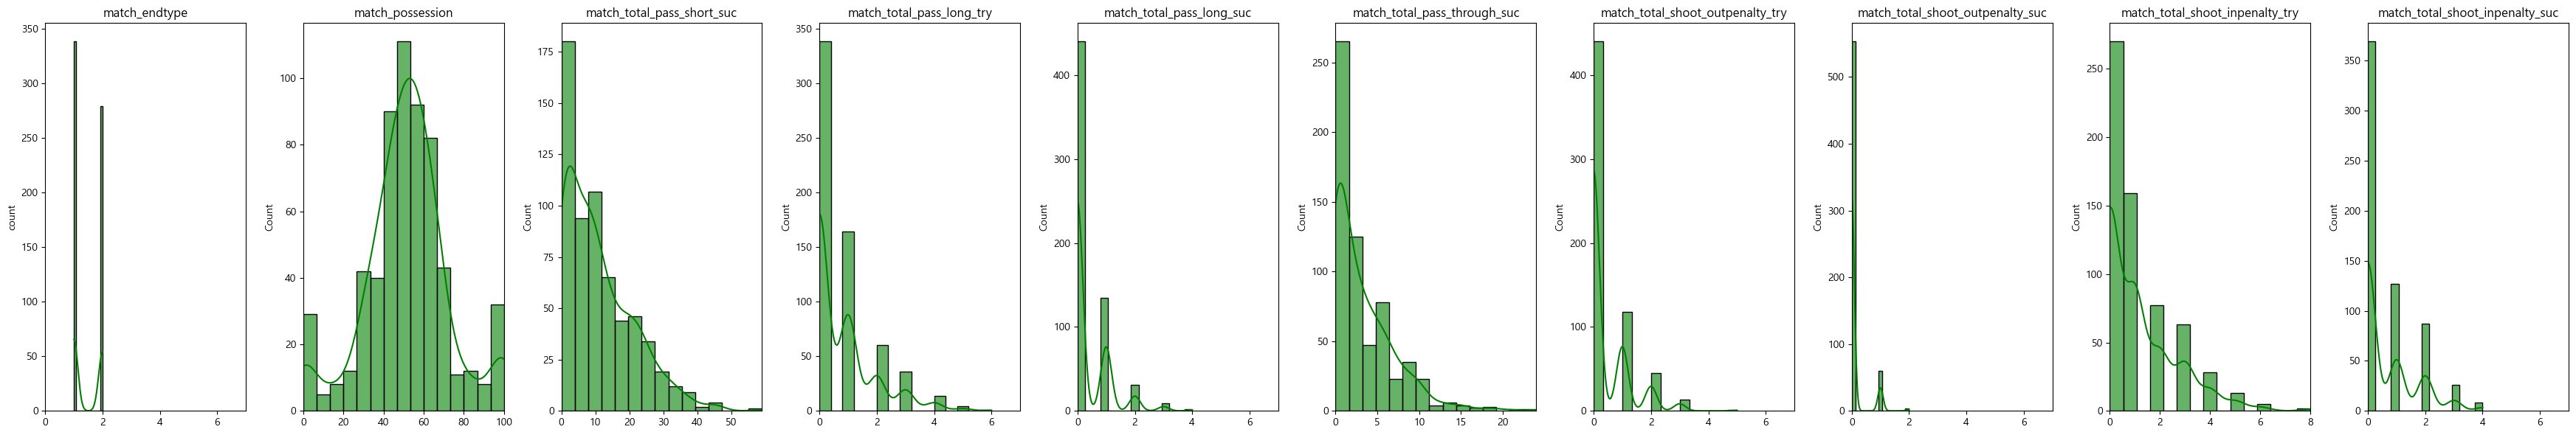

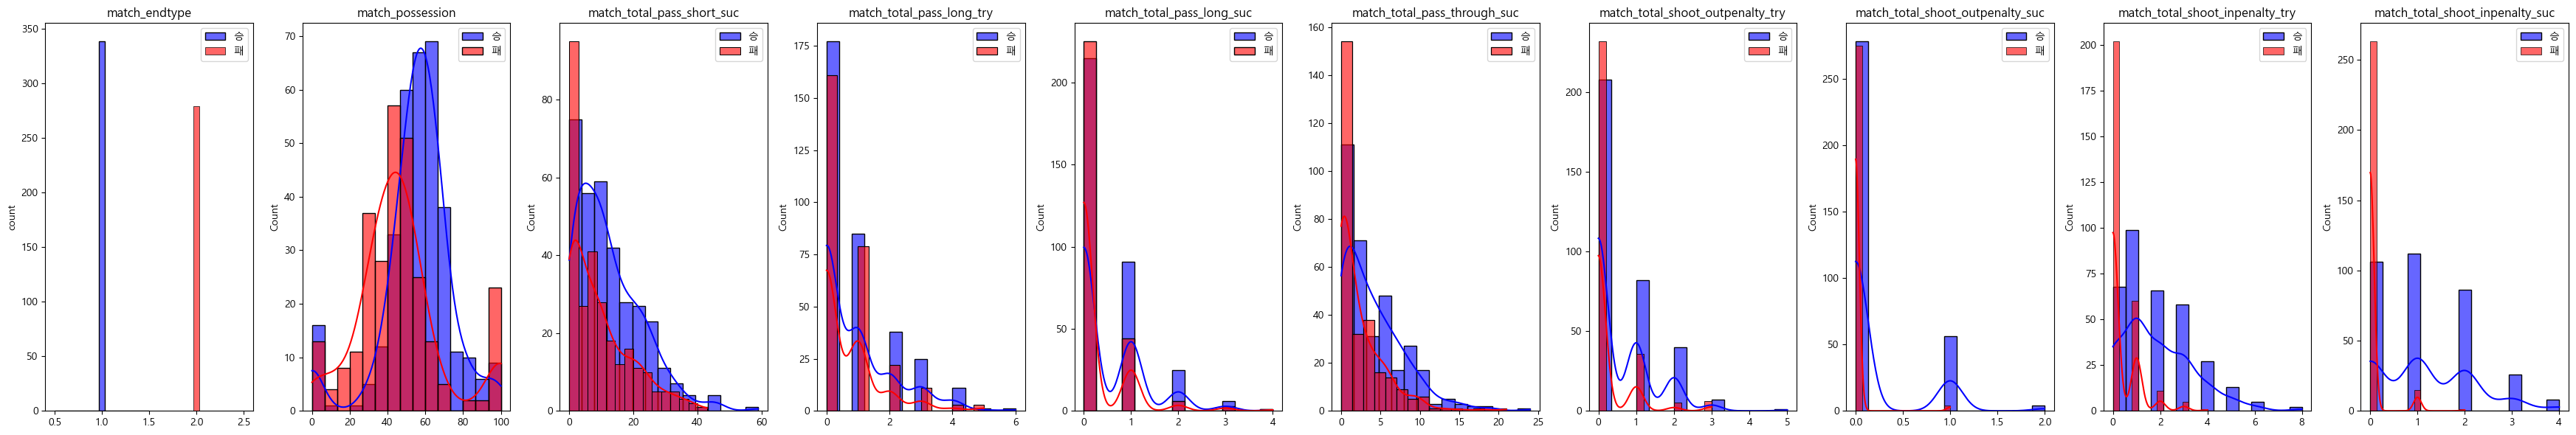

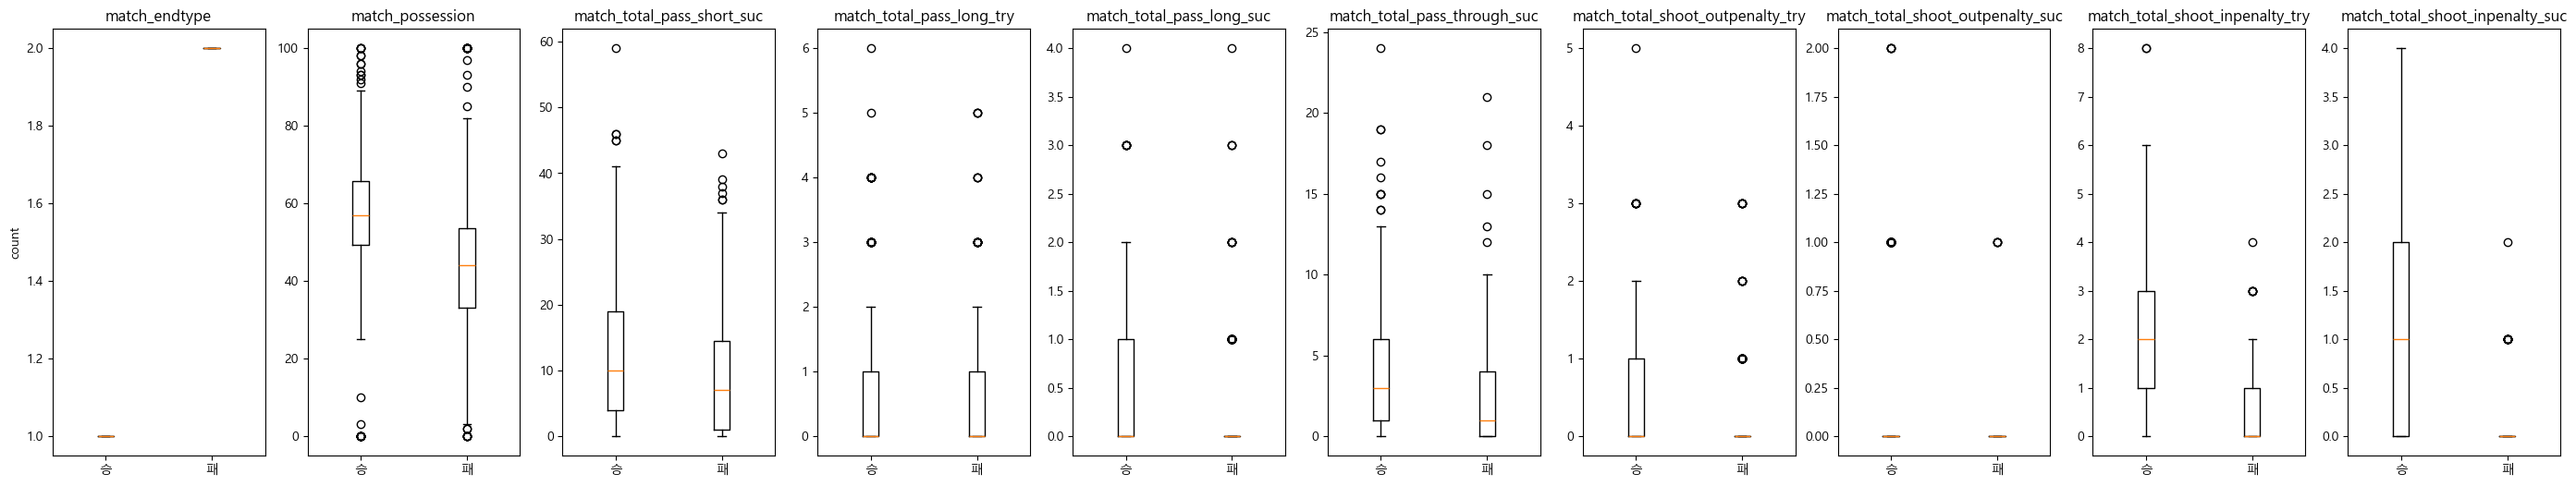

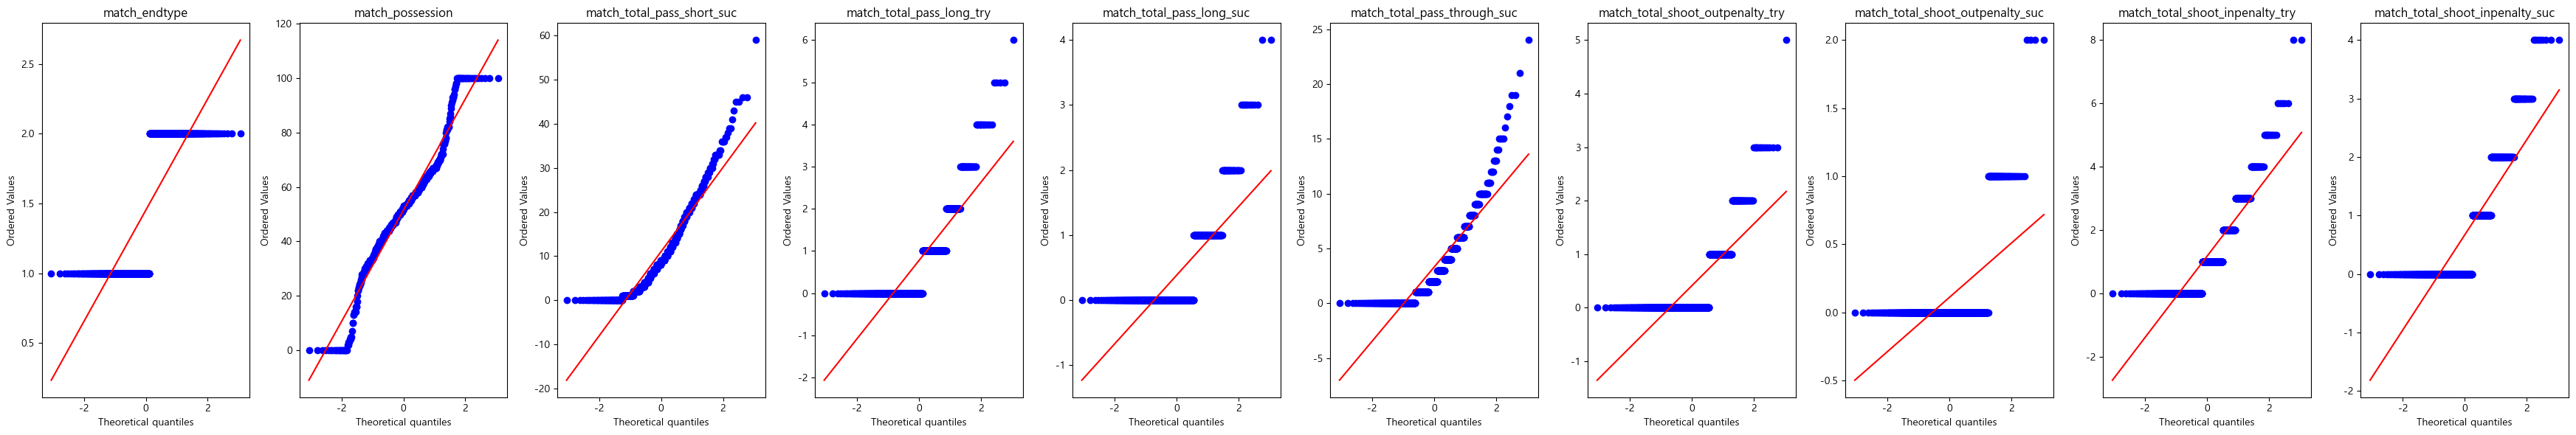

In [99]:
df4 = df1[['match_result'] + list(df2_temp.columns)]

df4_win = df4[df4['match_result'] == '승']
df4_lose = df4[df4['match_result'] == '패']

df4_temp = df4.drop(columns = ['match_result'])

col_hist_all(df4_temp, df4_temp.columns);
col_hist(df4_win, df4_lose, df4_temp.columns);
col_boxplot(df4_win, df4_lose, df4_temp.columns, False);
col_qqplot_all(df4_temp, df4_temp.columns);

In [100]:
normality_test(df4, df4_win, df4_lose, df4_temp.columns)

match_endtype 
 정규성 검정: 
 전체: p-value=3.0727546918590367e-34                                      
 승: p-value=(1.0, nan)                                      
 패: p-value=(1.0, nan)                                      
 Levene’s test p-value=nan
match_possession 
 정규성 검정: 
 전체: p-value=2.8897382320829137e-12                                      
 승: p-value=(4.312937636017432e-14, 4.600481517226662e-05)                                      
 패: p-value=(1.6920590896507143e-11, 0.00021992861906716338)                                      
 Levene’s test p-value=0.004733281948333293
match_total_pass_short_suc 
 정규성 검정: 
 전체: p-value=5.78969353909845e-20                                      
 승: p-value=(3.080654363053702e-13, 0.00015492029128928877)                                      
 패: p-value=(7.17607127297545e-15, 5.195188582314446e-07)                                      
 Levene’s test p-value=0.4144253873504652
match_total_pass_long_try 
 정규성 검정: 
 전체: p-value=1.288496102205

In [101]:
group_difference_test(df4_win, df4_lose, df4_temp.columns)

-----------------------------------------------------
match_endtype은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_possession은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_short_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoo

---

# PRACTICE

In [62]:
# match_total_goal, match_possession, match_total_shoot_inpenalty_try, 
# match_total_pass_short_try, match_total_pass_long_try, match_total_pass_through_try
# match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try

column_name = 'match_total_shoot_inpenalty_try'

temp_query = f"SELECT match_result, {column_name} FROM match_user;"
df_temp = pd.read_sql(temp_query, con = engine);

df_temp[column_name] += 0.1
df_temp[f'{column_name}_boxcox'] = stats.boxcox(df_temp[column_name])[0] 

x = df_temp[column_name]
x_win = df_temp[df_temp['match_result'] == '승'][column_name]
x_lose = df_temp[df_temp['match_result'] == '패'][column_name]

y = df_temp[f'{column_name}_boxcox'] 
y_win = df_temp[df_temp['match_result'] == '승'][f'{column_name}_boxcox'] 
y_lose = df_temp[df_temp['match_result'] == '패'][f'{column_name}_boxcox'] 

2024-12-19 19:37:48,316 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-19 19:37:48,317 INFO sqlalchemy.engine.Engine [cached since 23.27s ago] {'table_schema': 'side_proj_fco', 'table_name': 'SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;'}
2024-12-19 19:37:48,319 INFO sqlalchemy.engine.Engine SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;
2024-12-19 19:37:48,320 INFO sqlalchemy.engine.Engine [raw sql] {}


In [63]:
print(shapiro(x))
print(kstest(x, 'norm', args=(x.mean(), x.std())))

if shapiro(x).pvalue > 0.05 :
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if kstest(x, 'norm', args=(x.mean(), x.std())).pvalue > 0.05 : 
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_win))
print(kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())))

if shapiro(x_win).pvalue > 0.05 :
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())).pvalue > 0.05 : 
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_lose))
print(kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())))

if shapiro(x_lose).pvalue > 0.05 :
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())).pvalue > 0.05 : 
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
stat_win_shap, p_val_win_shap = shapiro(y_win)
stat_lose_shap, p_val_lose_shap = shapiro(y_lose)

stat_win_kosm, p_val_win_kosm = kstest(y_win, 'norm', args=(y_win.mean(), y_win.std()))
stat_lose_kosm, p_val_lose_kosm = kstest(y_lose, 'norm', args=(y_lose.mean(), y_lose.std()))

stat, p_val = levene(y_win, y_lose)

print(f'{column_name} \n 승: p-value={p_val_win_shap, p_val_win_kosm} \
                \n 패: p-value={p_val_lose_shap, p_val_lose_kosm} \
                \n Levene’s test p-value={p_val}')

if p_val_win_shap > 0.05 and p_val_lose_shap > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

if p_val > 0.05:
    print(f'{column_name}은(는) 등분산을 따른다고 볼 수 있음')
else:
    print(f'{column_name}은(는) 등분산을 따르지 않음')

if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05): 
    stat, p_val = ttest_ind(y_win, y_lose, equal_var=True)
    test_type = "t-test"
    
else:  
    stat, p_val = mannwhitneyu(y_win, y_lose)
    test_type = "Mann-Whitney U test"

if p_val < 0.05:
    print(f'{column_name}은(는) 승패에 따라 유의미한 차이가 있음')
else:
    print(f'{column_name}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

ShapiroResult(statistic=0.6068821114896326, pvalue=1.6693034088821562e-62)
KstestResult(statistic=0.26226460879254326, pvalue=9.828532862056203e-173, statistic_location=0.1, statistic_sign=-1)
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=0.6597235089040101, pvalue=1.1865033090730458e-47)
KstestResult(statistic=0.21875897799363542, pvalue=8.344331102622533e-64, statistic_location=3.1, statistic_sign=1)
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=0.6095004387681483, pvalue=1.3331822278179532e-47)
KstestResult(statistic=0.3993146539382591, pvalue=5.1681671625538594e-192, statistic_location=0.1, statistic_sign=1)
match_total_shoot_inpenalty_try_lose 은(는) 정규분포를 따르지 않음, _shap
match_tota

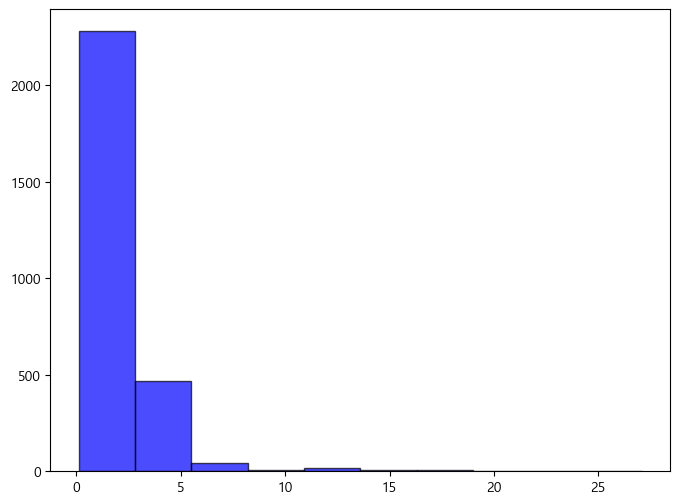

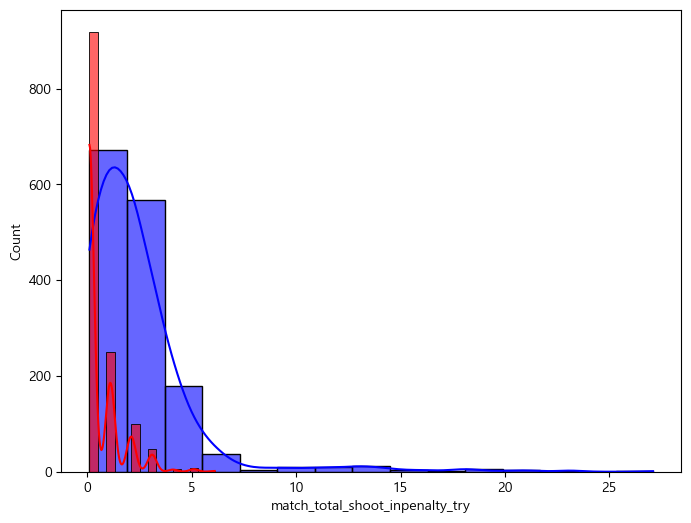

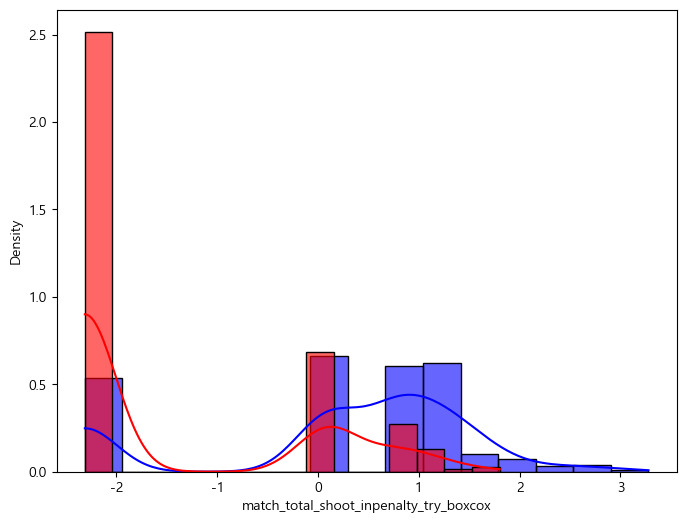

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))  

ax.hist(x, color='blue', alpha=0.7, edgecolor='black')

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(x_win, color='blue', bins = 15, kde=True, ax=ax, label='승', alpha=0.6);
sns.histplot(x_lose, color='red', bins = 15, kde=True, ax=ax, label='패', alpha=0.6);

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(y_win, color='blue', bins = 15, kde=True, ax=ax, label='승', stat="density", alpha=0.6);
sns.histplot(y_lose, color='red', bins = 15, kde=True, ax=ax, label='패', stat="density", alpha=0.6);

---

In [133]:
df3_position_temp = df3[['match_result'] + position_ratings_col].copy()

In [134]:
df3_position_temp = df3_position_temp[df3_position_temp['attack_position_ratings'] != 10]
df3_position_temp = df3_position_temp[df3_position_temp['middle_position_ratings'] != 10]
df3_position_temp = df3_position_temp[df3_position_temp['defense_position_ratings'] != 10]
df3_position_temp = df3_position_temp[df3_position_temp['goalkeeper_position_ratings'] != 10]

In [135]:
df3_position_temp_qq = df3_position_temp.copy()

In [136]:
df3_position_temp_win = df3_position_temp[df3_position_temp['match_result'] == '승']
df3_position_temp_lose = df3_position_temp[df3_position_temp['match_result'] == '패']

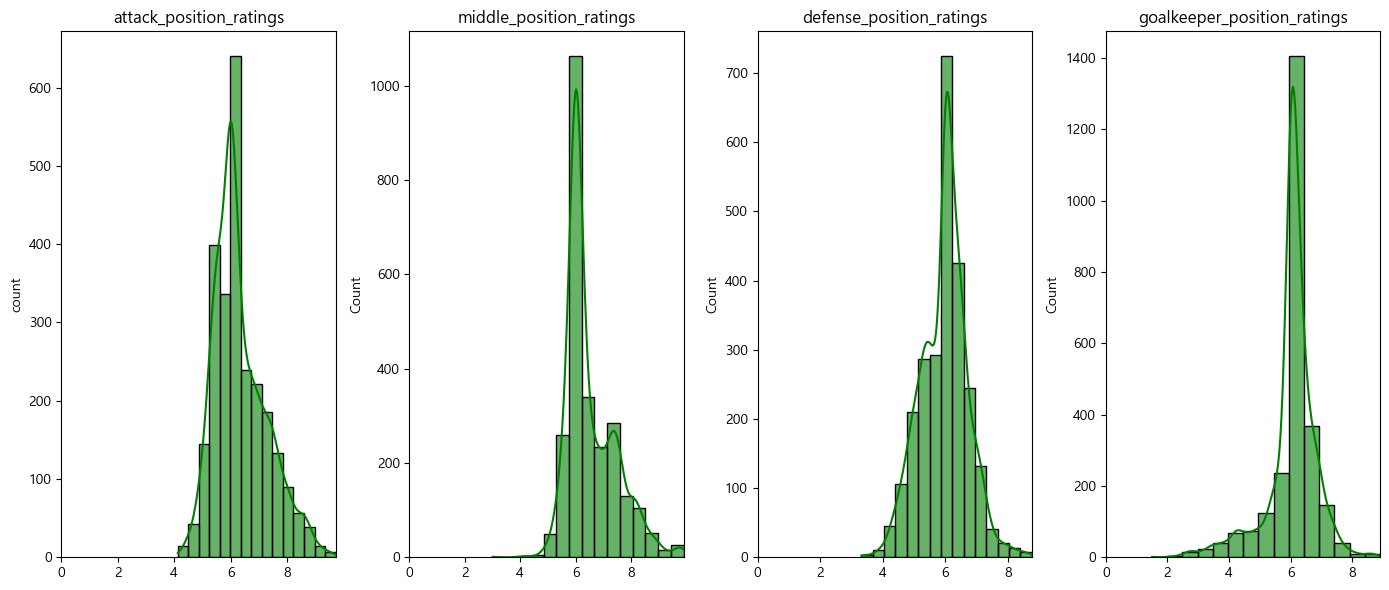

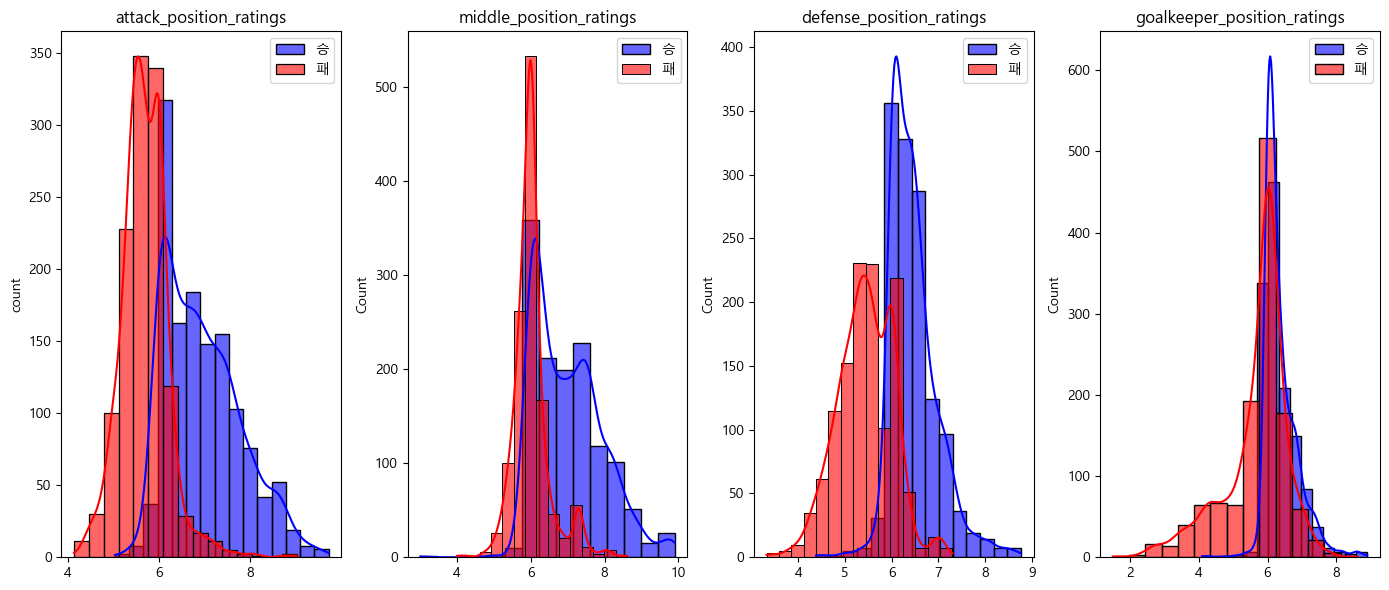

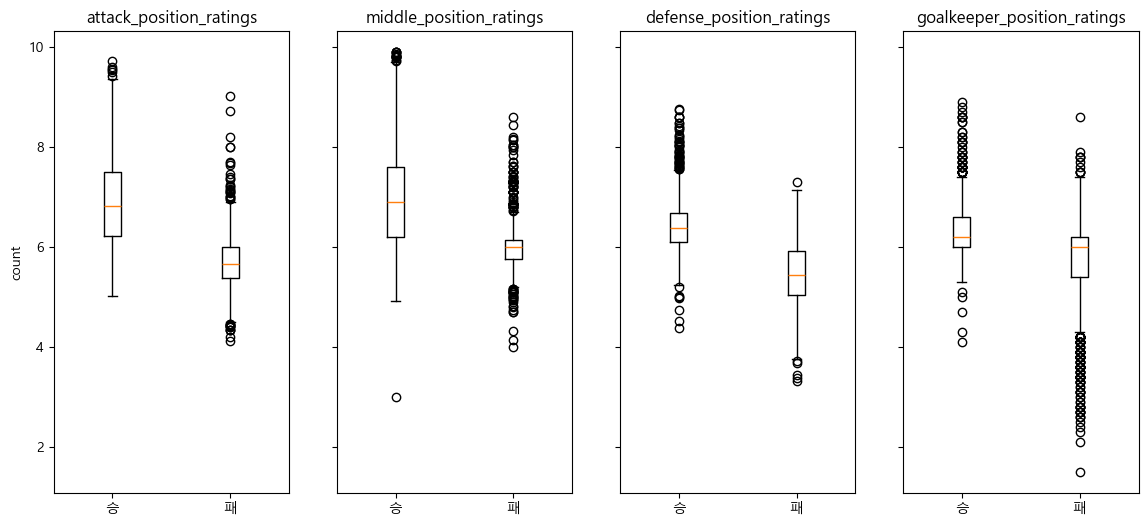

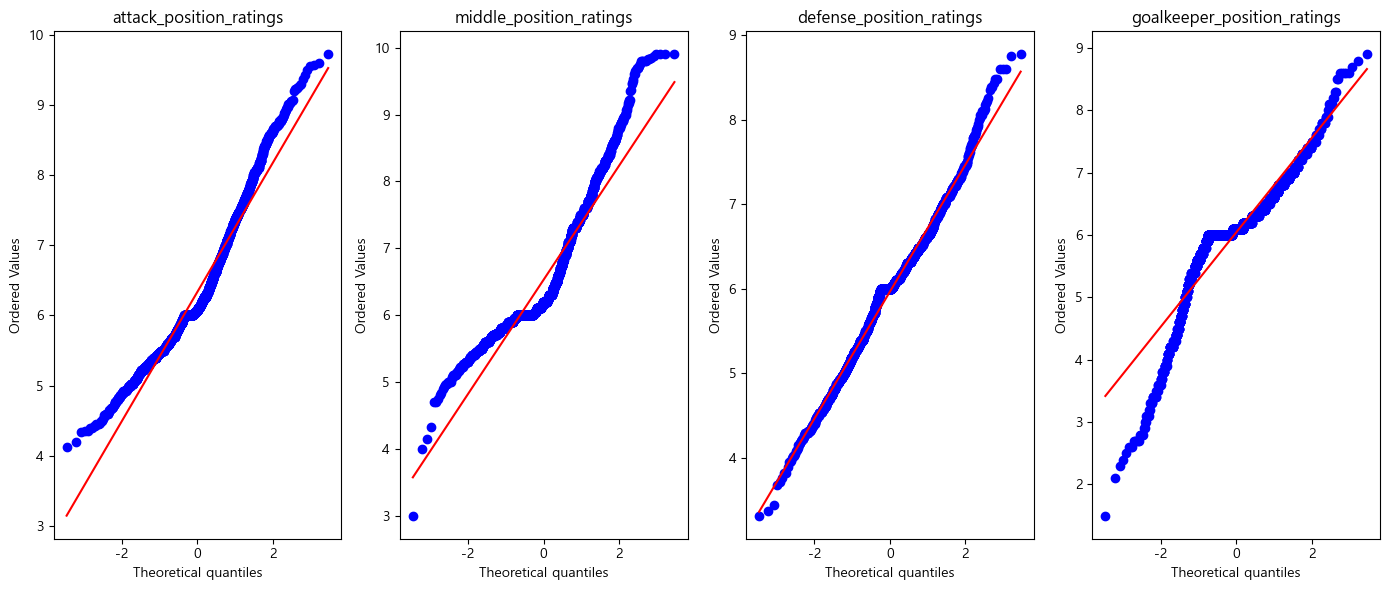

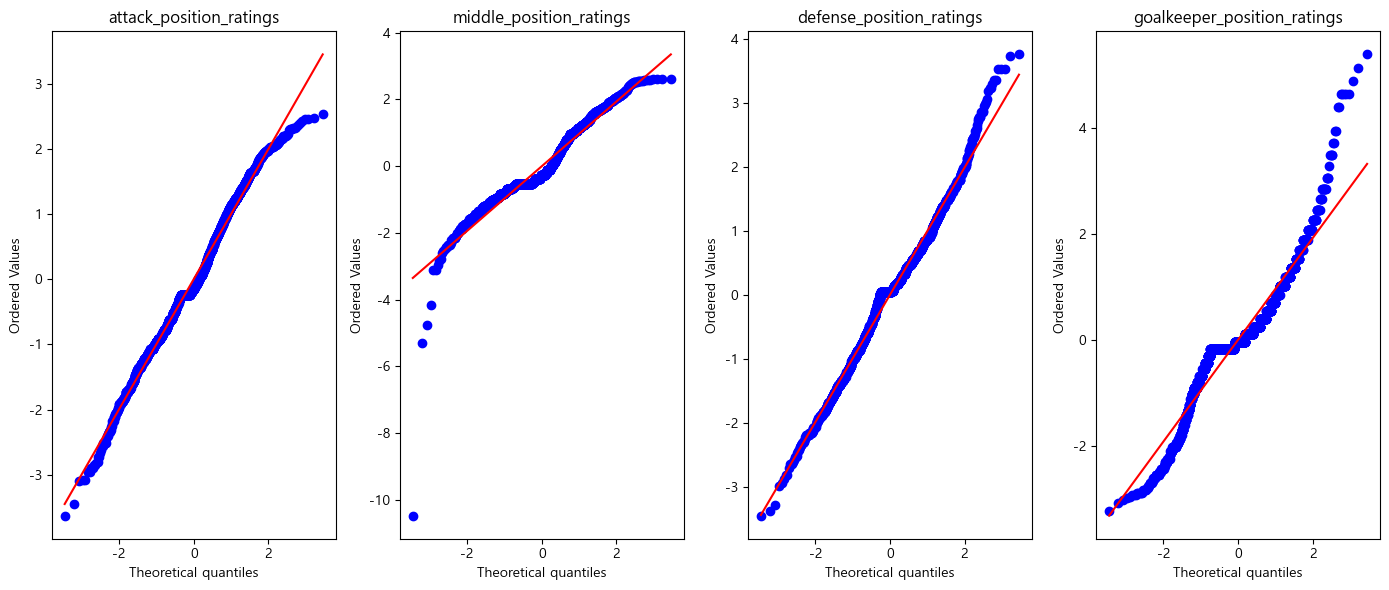

In [137]:
col_hist_all(df3_position_temp, position_ratings_col);
col_hist(df3_position_temp_win, df3_position_temp_lose, position_ratings_col);
col_boxplot(df3_position_temp_win, df3_position_temp_lose, position_ratings_col, True);
col_qqplot_all(df3_position_temp, position_ratings_col);
col_qqplot_norm_all(df3_position_temp_qq, position_ratings_col);

In [138]:
df3_position_temp_qq_win = df3_position_temp_qq[df3_position_temp_qq['match_result'] == '승']
df3_position_temp_qq_lose = df3_position_temp_qq[df3_position_temp_qq['match_result'] == '패']

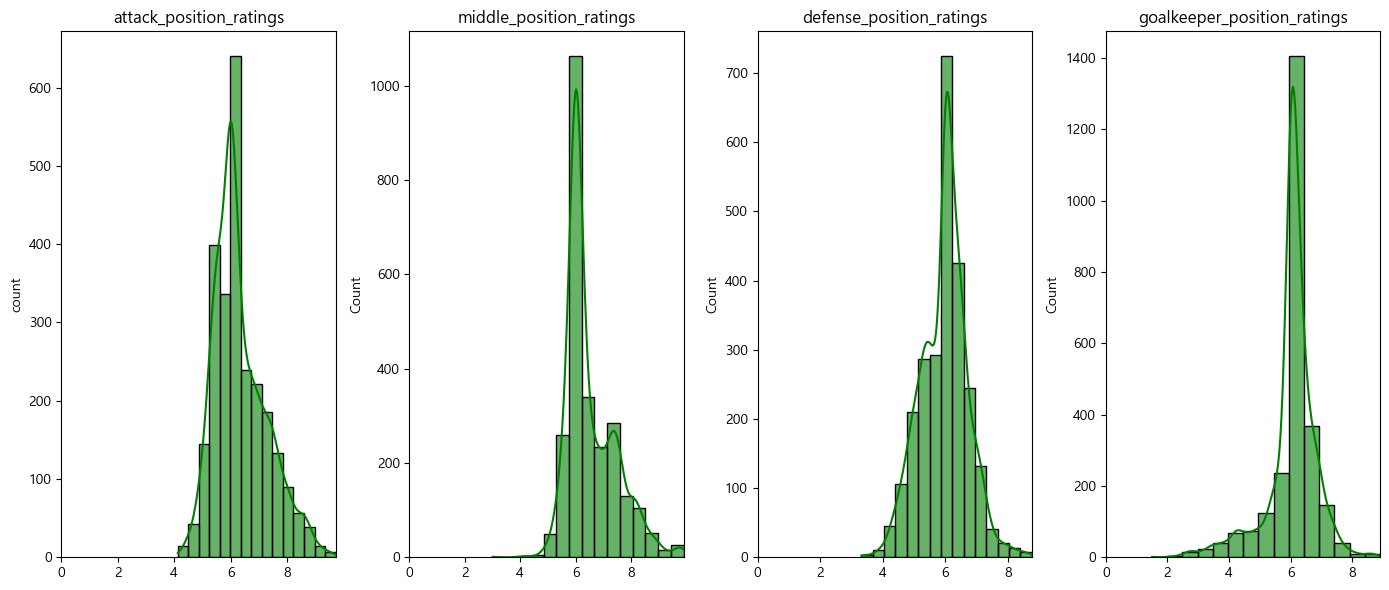

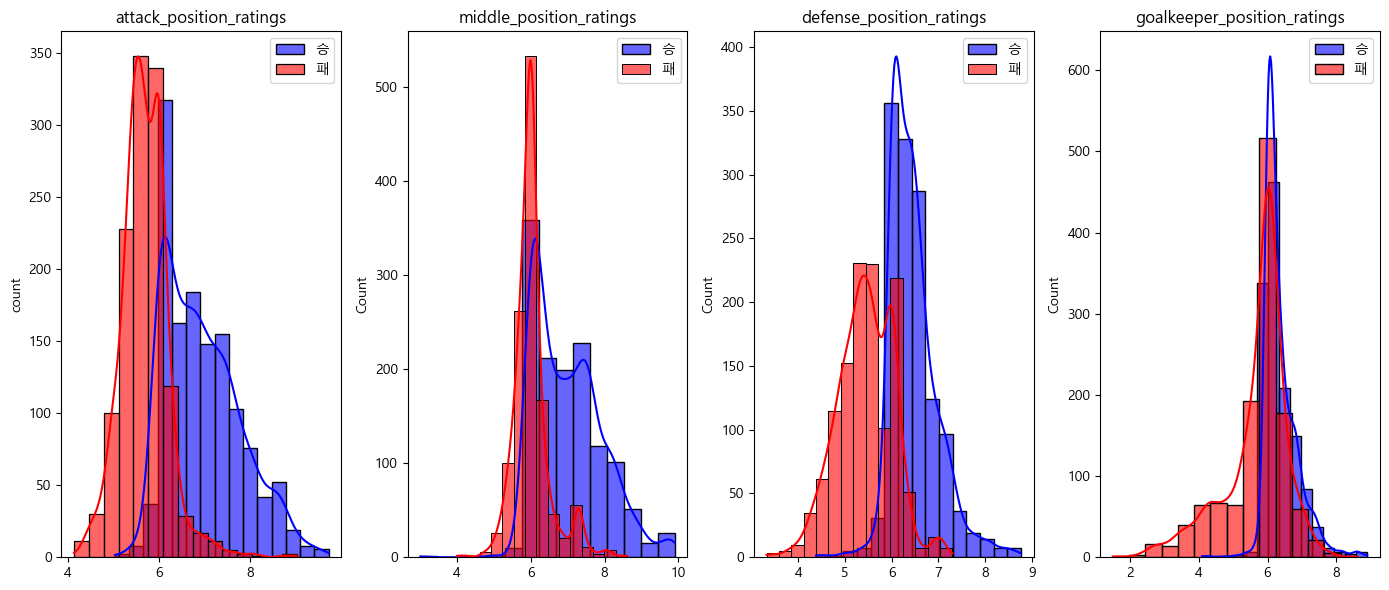

In [142]:
col_hist_all(df3_position_temp, position_ratings_col);
col_hist(df3_position_temp_win, df3_position_temp_lose, position_ratings_col);

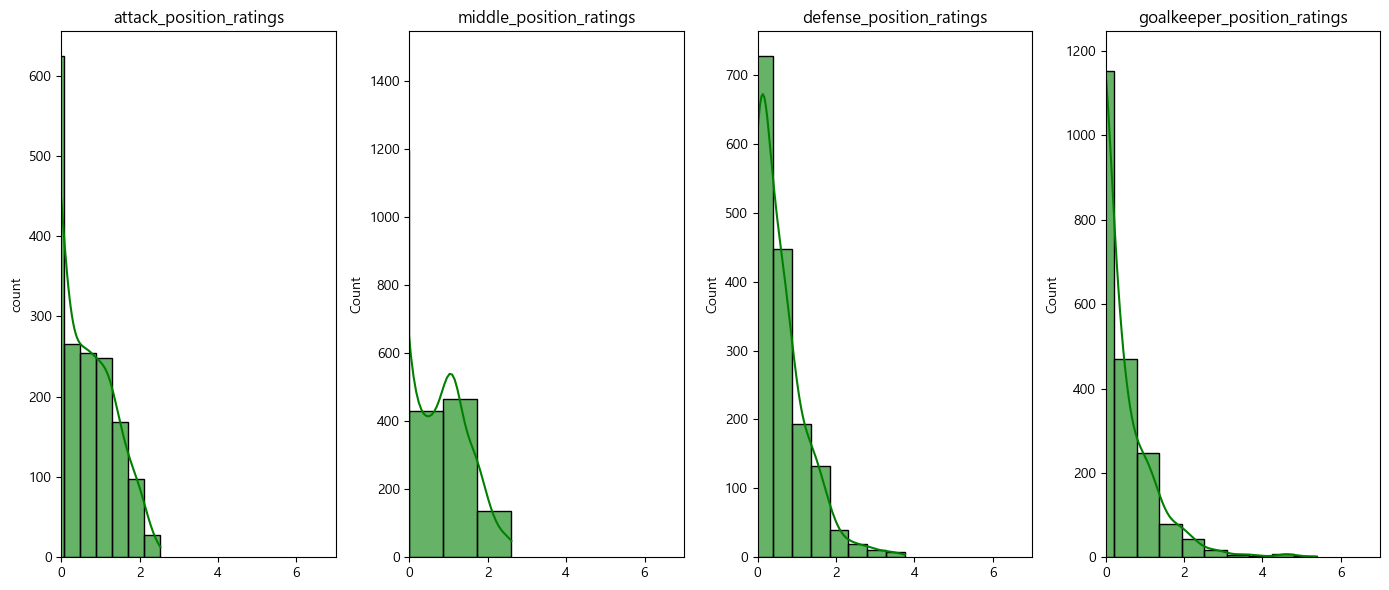

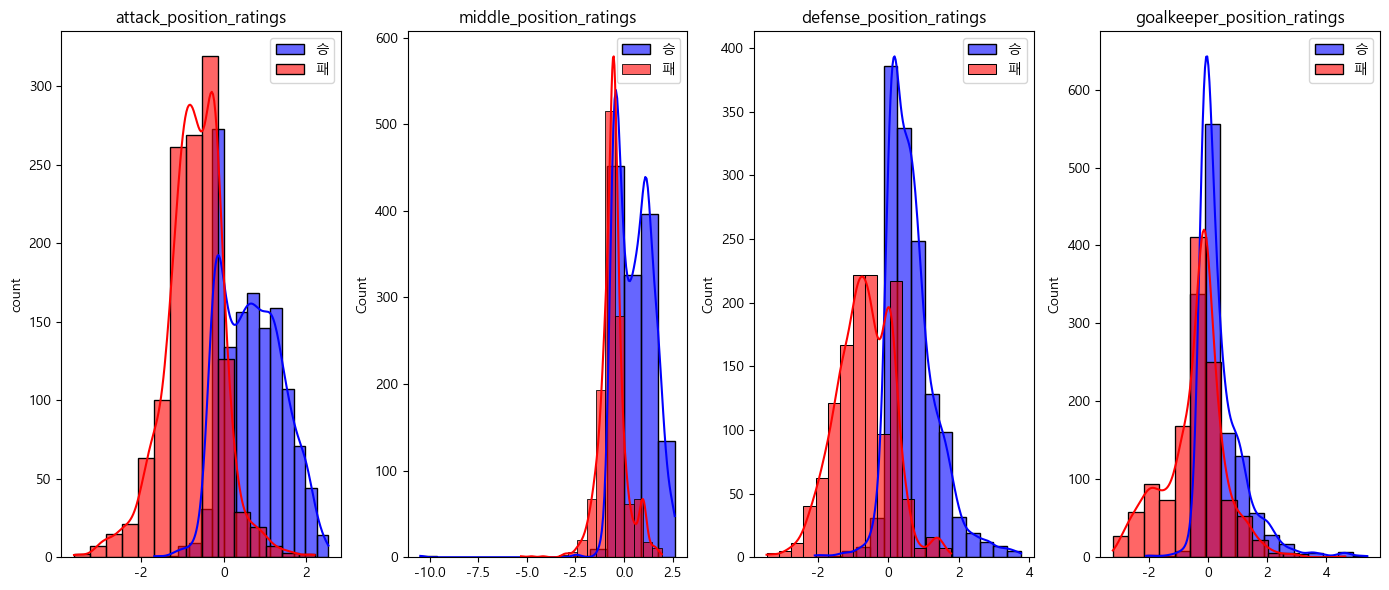

In [139]:
col_hist_all(df3_position_temp_qq, position_ratings_col);
col_hist(df3_position_temp_qq_win, df3_position_temp_qq_lose, position_ratings_col);

In [141]:
normality_test(df3_position_temp_win, df3_position_temp_lose, position_ratings_col)

attack_position_ratings 
 승: p-value=(2.779015395968604e-21, 4.018637369315889e-09)                       
 패: p-value=(1.170976428664024e-19, 6.744744358620897e-07)                       
 Levene’s test p-value=2.7809970904867556e-64
middle_position_ratings 
 승: p-value=(4.972674829823879e-24, 3.4884025857940325e-14)                       
 패: p-value=(5.114963007190142e-30, 3.96268071998687e-37)                       
 Levene’s test p-value=8.847980584628235e-113
defense_position_ratings 
 승: p-value=(3.017460847739262e-26, 2.094219461298858e-18)                       
 패: p-value=(1.8865756008367834e-07, 6.611621878220369e-05)                       
 Levene’s test p-value=3.2953285756175747e-10
goalkeeper_position_ratings 
 승: p-value=(2.443573851748739e-34, 9.020712999214966e-44)                       
 패: p-value=(3.7314025151496756e-28, 1.4031573410479406e-40)                       
 Levene’s test p-value=1.2158480815732963e-32
----------------------------------------------------

In [140]:
normality_test(df3_position_temp_qq_win, df3_position_temp_qq_lose, position_ratings_col)

attack_position_ratings 
 승: p-value=(3.823417749096195e-15, 4.069380587741458e-06)                       
 패: p-value=(1.1364816002355992e-13, 0.0002956723110489443)                       
 Levene’s test p-value=8.682348402672721e-07
middle_position_ratings 
 승: p-value=(1.6277782241423984e-27, 1.0500406019613864e-10)                       
 패: p-value=(4.896043935746978e-25, 1.7231384043306203e-22)                       
 Levene’s test p-value=2.380010404421132e-50
defense_position_ratings 
 승: p-value=(1.7586830480178728e-26, 1.5281133095701553e-18)                       
 패: p-value=(2.4207376831786177e-07, 6.486874846964313e-05)                       
 Levene’s test p-value=3.3182922646803644e-09
goalkeeper_position_ratings 
 승: p-value=(1.2374528540275727e-38, 1.127293664150749e-50)                       
 패: p-value=(3.9639578237195276e-19, 1.8056600170191988e-28)                       
 Levene’s test p-value=2.9000619550701555e-12
-----------------------------------------------

In [ ]:
df_temp_df = pd.read_csv()